In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pip install torchtext

In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Dataset Statistics:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-

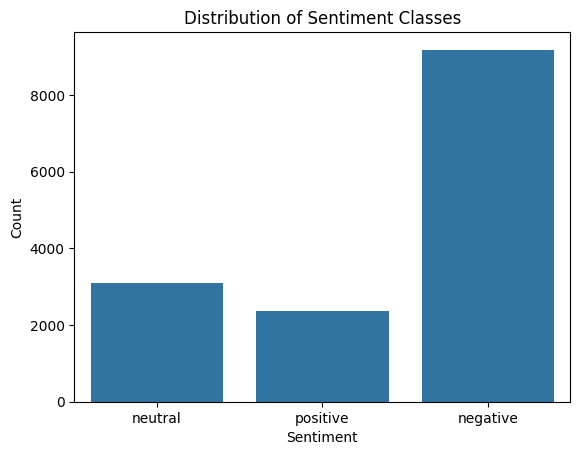

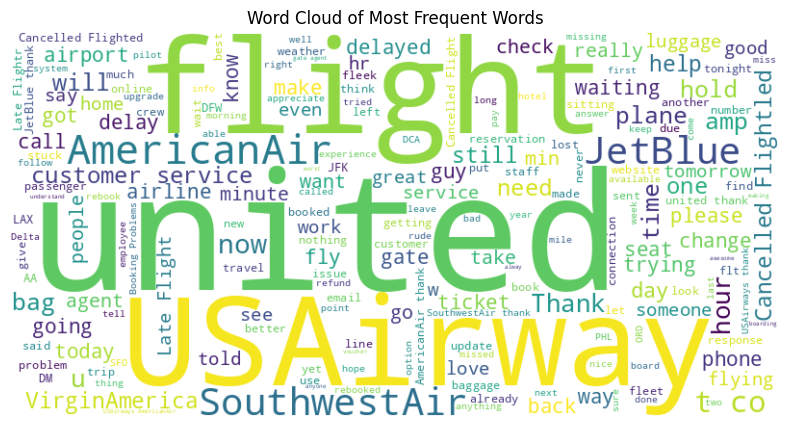

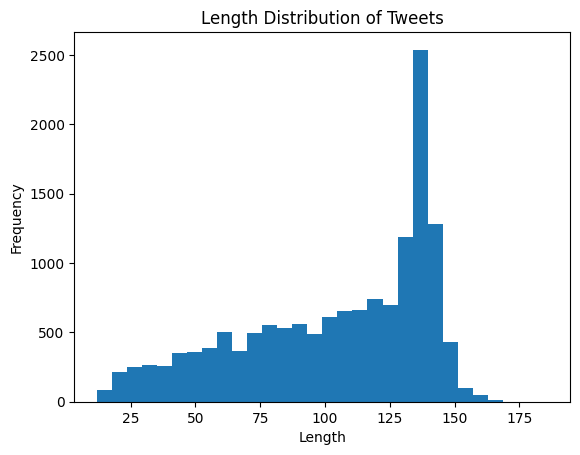

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from nltk.tokenize import word_tokenize
from collections import Counter
from torchtext.data.utils import get_tokenizer
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from wordcloud import WordCloud


#Read and preprocess the dataset
data = pd.read_csv("/content/drive/MyDrive/Tweets.csv")

# Main statistics
print("Dataset Statistics:")
print(data.info())
print("\nNumber of entries:", len(data))
print("\nDistribution of sentiment:")
print(data['airline_sentiment'].value_counts())

# Data Visualization
# Visualization 1: Distribution of sentiment classes
sns.countplot(x='airline_sentiment', data=data)
plt.title('Distribution of Sentiment Classes')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Visualization 2: Word cloud of most frequent words
all_text = ' '.join(data['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Words')
plt.show()

# Visualization 3: Length distribution of tweets
tweet_lengths = data['text'].apply(len)
plt.hist(tweet_lengths, bins=30)
plt.title('Length Distribution of Tweets')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

Setup  1    Learning rate: 0.005     Number of epochs: 10     Momentum: 0.8
Epoch 1/10, Learning Rate: 0.005, Momentum: 0.8, Train Loss: 0.9397, Train Accuracy: 0.6251, Val Loss: 0.9343, Val Accuracy: 0.6112
Epoch 2/10, Learning Rate: 0.005, Momentum: 0.8, Train Loss: 0.9194, Train Accuracy: 0.6251, Val Loss: 0.9341, Val Accuracy: 0.6112
Epoch 3/10, Learning Rate: 0.005, Momentum: 0.8, Train Loss: 0.9194, Train Accuracy: 0.6251, Val Loss: 0.9341, Val Accuracy: 0.6112
Epoch 4/10, Learning Rate: 0.005, Momentum: 0.8, Train Loss: 0.9191, Train Accuracy: 0.6251, Val Loss: 0.9337, Val Accuracy: 0.6112
Epoch 5/10, Learning Rate: 0.005, Momentum: 0.8, Train Loss: 0.9189, Train Accuracy: 0.6251, Val Loss: 0.9344, Val Accuracy: 0.6112
Epoch 6/10, Learning Rate: 0.005, Momentum: 0.8, Train Loss: 0.9188, Train Accuracy: 0.6251, Val Loss: 0.9342, Val Accuracy: 0.6112
Epoch 7/10, Learning Rate: 0.005, Momentum: 0.8, Train Loss: 0.9188, Train Accuracy: 0.6251, Val Loss: 0.9331, Val Accuracy: 0.6112


<Figure size 1000x600 with 0 Axes>

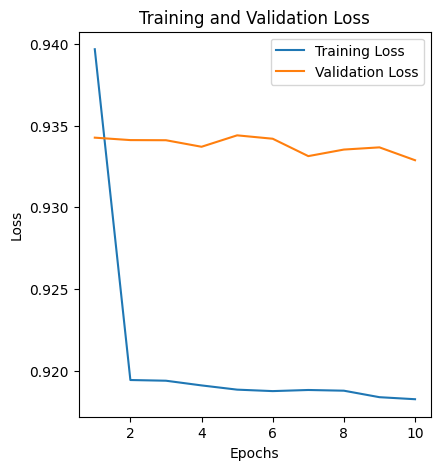

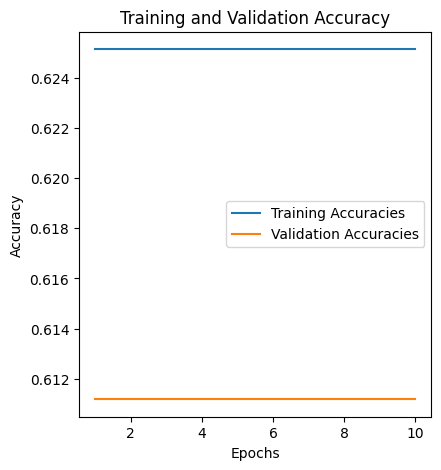

Test Loss: 0.8951, Test Accuracy: 64.5150
Setup  2    Learning rate: 0.005     Number of epochs: 10     Momentum: 0.9
Epoch 1/10, Learning Rate: 0.005, Momentum: 0.9, Train Loss: 0.9182, Train Accuracy: 0.6251, Val Loss: 0.9325, Val Accuracy: 0.6112
Epoch 2/10, Learning Rate: 0.005, Momentum: 0.9, Train Loss: 0.9176, Train Accuracy: 0.6251, Val Loss: 0.9315, Val Accuracy: 0.6112
Epoch 3/10, Learning Rate: 0.005, Momentum: 0.9, Train Loss: 0.9147, Train Accuracy: 0.6251, Val Loss: 0.9276, Val Accuracy: 0.6112
Epoch 4/10, Learning Rate: 0.005, Momentum: 0.9, Train Loss: 0.9025, Train Accuracy: 0.6251, Val Loss: 0.9134, Val Accuracy: 0.6112
Epoch 5/10, Learning Rate: 0.005, Momentum: 0.9, Train Loss: 0.8944, Train Accuracy: 0.6251, Val Loss: 0.8947, Val Accuracy: 0.6112
Epoch 6/10, Learning Rate: 0.005, Momentum: 0.9, Train Loss: 0.8668, Train Accuracy: 0.6287, Val Loss: 0.8831, Val Accuracy: 0.6189
Epoch 7/10, Learning Rate: 0.005, Momentum: 0.9, Train Loss: 0.8524, Train Accuracy: 0.626

<Figure size 1000x600 with 0 Axes>

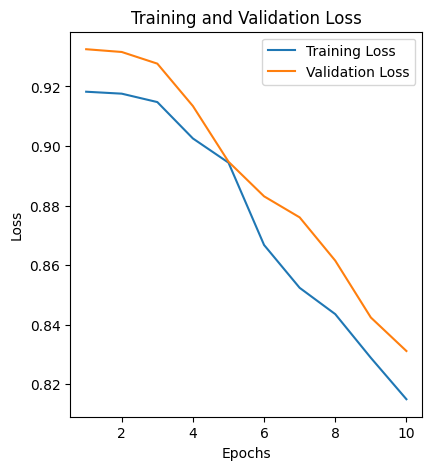

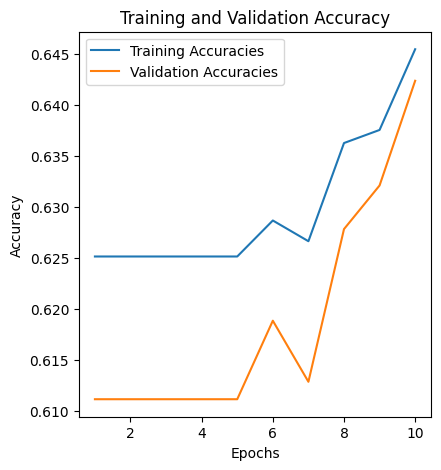

Test Loss: 0.7921, Test Accuracy: 65.9495
Setup  3    Learning rate: 0.005     Number of epochs: 15     Momentum: 0.8
Epoch 1/15, Learning Rate: 0.005, Momentum: 0.8, Train Loss: 0.7993, Train Accuracy: 0.6575, Val Loss: 0.8274, Val Accuracy: 0.6517
Epoch 2/15, Learning Rate: 0.005, Momentum: 0.8, Train Loss: 0.7931, Train Accuracy: 0.6633, Val Loss: 0.8236, Val Accuracy: 0.6551
Epoch 3/15, Learning Rate: 0.005, Momentum: 0.8, Train Loss: 0.7848, Train Accuracy: 0.6676, Val Loss: 0.8195, Val Accuracy: 0.6598
Epoch 4/15, Learning Rate: 0.005, Momentum: 0.8, Train Loss: 0.7783, Train Accuracy: 0.6734, Val Loss: 0.8121, Val Accuracy: 0.6603
Epoch 5/15, Learning Rate: 0.005, Momentum: 0.8, Train Loss: 0.7700, Train Accuracy: 0.6762, Val Loss: 0.8187, Val Accuracy: 0.6637
Epoch 6/15, Learning Rate: 0.005, Momentum: 0.8, Train Loss: 0.7596, Train Accuracy: 0.6831, Val Loss: 0.7983, Val Accuracy: 0.6709
Epoch 7/15, Learning Rate: 0.005, Momentum: 0.8, Train Loss: 0.7492, Train Accuracy: 0.687

<Figure size 1000x600 with 0 Axes>

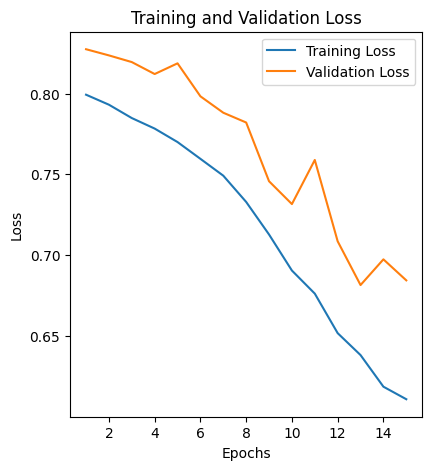

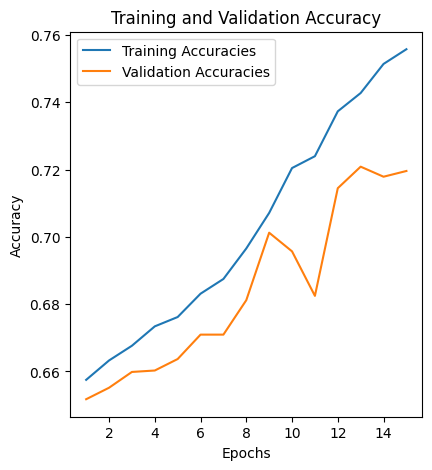

Test Loss: 0.6681, Test Accuracy: 72.1995
Setup  4    Learning rate: 0.005     Number of epochs: 15     Momentum: 0.9
Epoch 1/15, Learning Rate: 0.005, Momentum: 0.9, Train Loss: 0.6289, Train Accuracy: 0.7450, Val Loss: 0.7276, Val Accuracy: 0.6748
Epoch 2/15, Learning Rate: 0.005, Momentum: 0.9, Train Loss: 0.6073, Train Accuracy: 0.7594, Val Loss: 0.6762, Val Accuracy: 0.7273
Epoch 3/15, Learning Rate: 0.005, Momentum: 0.9, Train Loss: 0.5793, Train Accuracy: 0.7699, Val Loss: 0.6752, Val Accuracy: 0.7307
Epoch 4/15, Learning Rate: 0.005, Momentum: 0.9, Train Loss: 0.5593, Train Accuracy: 0.7776, Val Loss: 0.6819, Val Accuracy: 0.7320
Epoch 5/15, Learning Rate: 0.005, Momentum: 0.9, Train Loss: 0.5503, Train Accuracy: 0.7861, Val Loss: 0.6846, Val Accuracy: 0.7260
Epoch 6/15, Learning Rate: 0.005, Momentum: 0.9, Train Loss: 0.5286, Train Accuracy: 0.7912, Val Loss: 0.6780, Val Accuracy: 0.7286
Epoch 7/15, Learning Rate: 0.005, Momentum: 0.9, Train Loss: 0.5157, Train Accuracy: 0.798

<Figure size 1000x600 with 0 Axes>

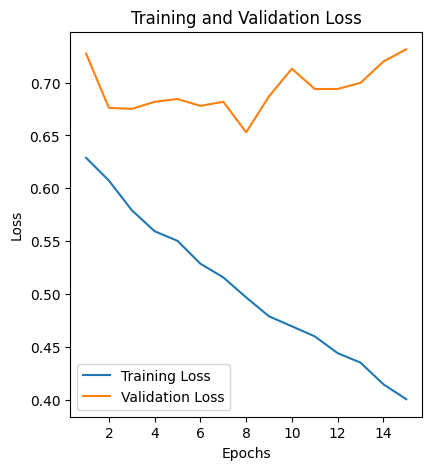

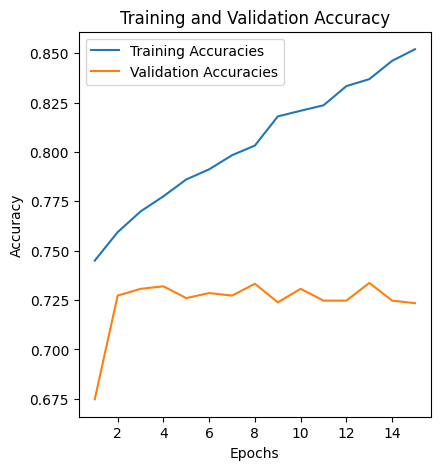

Test Loss: 0.6776, Test Accuracy: 75.5123
Setup  5    Learning rate: 0.005     Number of epochs: 20     Momentum: 0.8
Epoch 1/20, Learning Rate: 0.005, Momentum: 0.8, Train Loss: 0.3610, Train Accuracy: 0.8716, Val Loss: 0.7457, Val Accuracy: 0.7401
Epoch 2/20, Learning Rate: 0.005, Momentum: 0.8, Train Loss: 0.3554, Train Accuracy: 0.8730, Val Loss: 0.7419, Val Accuracy: 0.7320
Epoch 3/20, Learning Rate: 0.005, Momentum: 0.8, Train Loss: 0.3429, Train Accuracy: 0.8806, Val Loss: 0.7697, Val Accuracy: 0.7345
Epoch 4/20, Learning Rate: 0.005, Momentum: 0.8, Train Loss: 0.3308, Train Accuracy: 0.8838, Val Loss: 0.7355, Val Accuracy: 0.7362
Epoch 5/20, Learning Rate: 0.005, Momentum: 0.8, Train Loss: 0.3266, Train Accuracy: 0.8877, Val Loss: 0.8226, Val Accuracy: 0.7341
Epoch 6/20, Learning Rate: 0.005, Momentum: 0.8, Train Loss: 0.3173, Train Accuracy: 0.8900, Val Loss: 0.8040, Val Accuracy: 0.7324
Epoch 7/20, Learning Rate: 0.005, Momentum: 0.8, Train Loss: 0.3235, Train Accuracy: 0.888

<Figure size 1000x600 with 0 Axes>

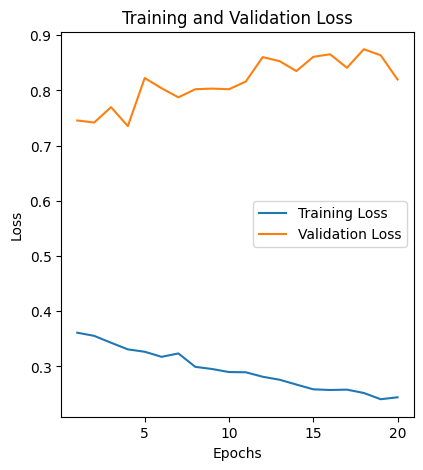

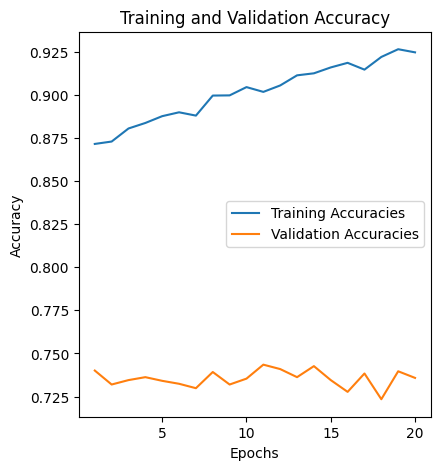

Test Loss: 0.8043, Test Accuracy: 74.0779
Setup  6    Learning rate: 0.005     Number of epochs: 20     Momentum: 0.9
Epoch 1/20, Learning Rate: 0.005, Momentum: 0.9, Train Loss: 0.2898, Train Accuracy: 0.9001, Val Loss: 0.8442, Val Accuracy: 0.7303
Epoch 2/20, Learning Rate: 0.005, Momentum: 0.9, Train Loss: 0.2709, Train Accuracy: 0.9100, Val Loss: 0.8035, Val Accuracy: 0.7345
Epoch 3/20, Learning Rate: 0.005, Momentum: 0.9, Train Loss: 0.2642, Train Accuracy: 0.9142, Val Loss: 0.8902, Val Accuracy: 0.7111
Epoch 4/20, Learning Rate: 0.005, Momentum: 0.9, Train Loss: 0.2800, Train Accuracy: 0.9031, Val Loss: 0.8242, Val Accuracy: 0.7076
Epoch 5/20, Learning Rate: 0.005, Momentum: 0.9, Train Loss: 0.2643, Train Accuracy: 0.9138, Val Loss: 0.8544, Val Accuracy: 0.7362
Epoch 6/20, Learning Rate: 0.005, Momentum: 0.9, Train Loss: 0.2456, Train Accuracy: 0.9191, Val Loss: 0.8157, Val Accuracy: 0.7461
Epoch 7/20, Learning Rate: 0.005, Momentum: 0.9, Train Loss: 0.2329, Train Accuracy: 0.925

<Figure size 1000x600 with 0 Axes>

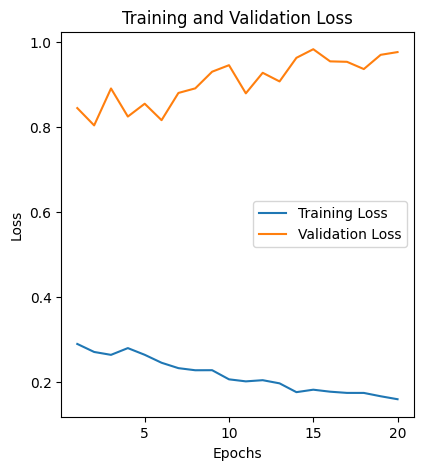

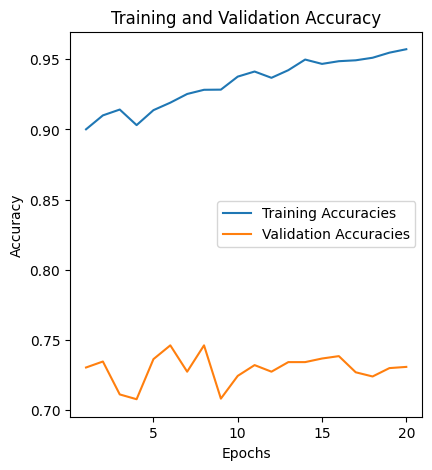

Test Loss: 0.9757, Test Accuracy: 74.1803
Setup  7    Learning rate: 0.01     Number of epochs: 10     Momentum: 0.8
Epoch 1/10, Learning Rate: 0.01, Momentum: 0.8, Train Loss: 0.1667, Train Accuracy: 0.9525, Val Loss: 0.9597, Val Accuracy: 0.7264
Epoch 2/10, Learning Rate: 0.01, Momentum: 0.8, Train Loss: 0.1618, Train Accuracy: 0.9560, Val Loss: 1.0119, Val Accuracy: 0.7290
Epoch 3/10, Learning Rate: 0.01, Momentum: 0.8, Train Loss: 0.1517, Train Accuracy: 0.9602, Val Loss: 1.0258, Val Accuracy: 0.7264
Epoch 4/10, Learning Rate: 0.01, Momentum: 0.8, Train Loss: 0.1576, Train Accuracy: 0.9563, Val Loss: 0.9963, Val Accuracy: 0.7456
Epoch 5/10, Learning Rate: 0.01, Momentum: 0.8, Train Loss: 0.1451, Train Accuracy: 0.9633, Val Loss: 0.9963, Val Accuracy: 0.7286
Epoch 6/10, Learning Rate: 0.01, Momentum: 0.8, Train Loss: 0.1506, Train Accuracy: 0.9586, Val Loss: 1.0386, Val Accuracy: 0.7230
Epoch 7/10, Learning Rate: 0.01, Momentum: 0.8, Train Loss: 0.1379, Train Accuracy: 0.9647, Val L

<Figure size 1000x600 with 0 Axes>

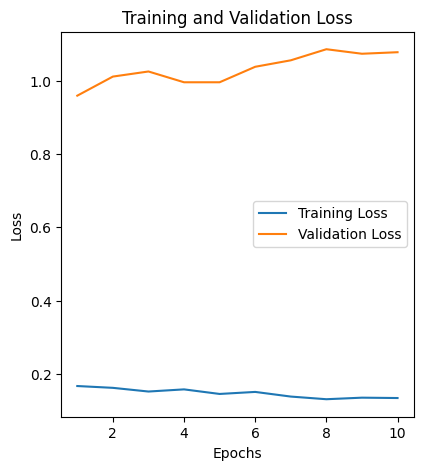

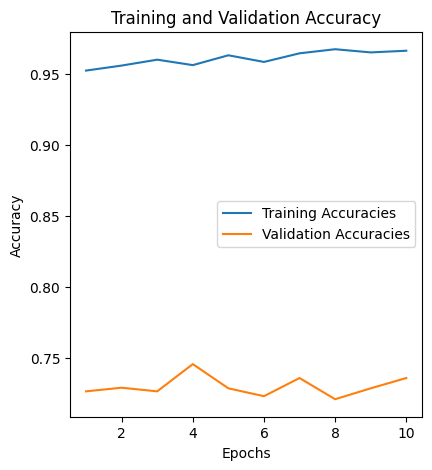

Test Loss: 1.0394, Test Accuracy: 74.4877
Setup  8    Learning rate: 0.01     Number of epochs: 10     Momentum: 0.9
Epoch 1/10, Learning Rate: 0.01, Momentum: 0.9, Train Loss: 0.2021, Train Accuracy: 0.9372, Val Loss: 0.9191, Val Accuracy: 0.7145
Epoch 2/10, Learning Rate: 0.01, Momentum: 0.9, Train Loss: 0.2033, Train Accuracy: 0.9394, Val Loss: 0.9071, Val Accuracy: 0.7149
Epoch 3/10, Learning Rate: 0.01, Momentum: 0.9, Train Loss: 0.1831, Train Accuracy: 0.9462, Val Loss: 0.9395, Val Accuracy: 0.7320
Epoch 4/10, Learning Rate: 0.01, Momentum: 0.9, Train Loss: 0.1715, Train Accuracy: 0.9499, Val Loss: 0.9998, Val Accuracy: 0.7273
Epoch 5/10, Learning Rate: 0.01, Momentum: 0.9, Train Loss: 0.1776, Train Accuracy: 0.9464, Val Loss: 0.9197, Val Accuracy: 0.7371
Epoch 6/10, Learning Rate: 0.01, Momentum: 0.9, Train Loss: 0.1717, Train Accuracy: 0.9472, Val Loss: 0.9736, Val Accuracy: 0.7337
Epoch 7/10, Learning Rate: 0.01, Momentum: 0.9, Train Loss: 0.1723, Train Accuracy: 0.9490, Val L

<Figure size 1000x600 with 0 Axes>

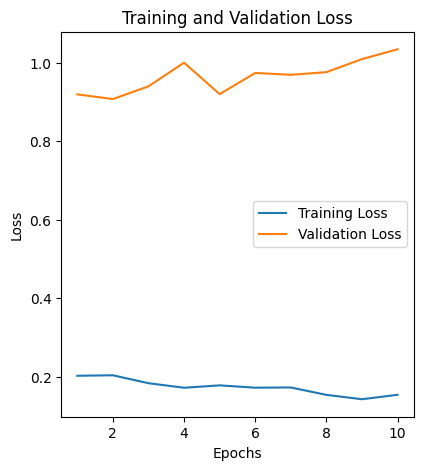

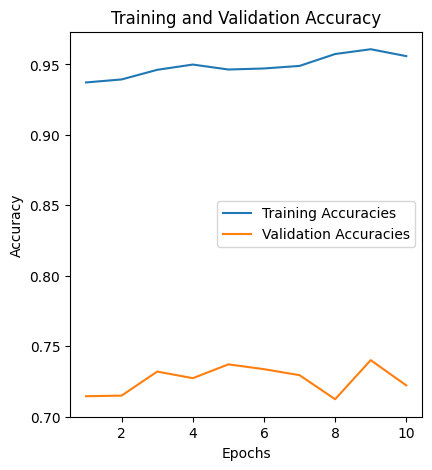

Test Loss: 0.9971, Test Accuracy: 73.5656
Setup  9    Learning rate: 0.01     Number of epochs: 15     Momentum: 0.8
Epoch 1/15, Learning Rate: 0.01, Momentum: 0.8, Train Loss: 0.1189, Train Accuracy: 0.9706, Val Loss: 1.0666, Val Accuracy: 0.7307
Epoch 2/15, Learning Rate: 0.01, Momentum: 0.8, Train Loss: 0.0928, Train Accuracy: 0.9806, Val Loss: 1.1148, Val Accuracy: 0.7307
Epoch 3/15, Learning Rate: 0.01, Momentum: 0.8, Train Loss: 0.0875, Train Accuracy: 0.9819, Val Loss: 1.1523, Val Accuracy: 0.7324
Epoch 4/15, Learning Rate: 0.01, Momentum: 0.8, Train Loss: 0.0864, Train Accuracy: 0.9820, Val Loss: 1.1618, Val Accuracy: 0.7345
Epoch 5/15, Learning Rate: 0.01, Momentum: 0.8, Train Loss: 0.0957, Train Accuracy: 0.9779, Val Loss: 1.1736, Val Accuracy: 0.7311
Epoch 6/15, Learning Rate: 0.01, Momentum: 0.8, Train Loss: 0.0847, Train Accuracy: 0.9817, Val Loss: 1.1657, Val Accuracy: 0.7256
Epoch 7/15, Learning Rate: 0.01, Momentum: 0.8, Train Loss: 0.0807, Train Accuracy: 0.9826, Val L

<Figure size 1000x600 with 0 Axes>

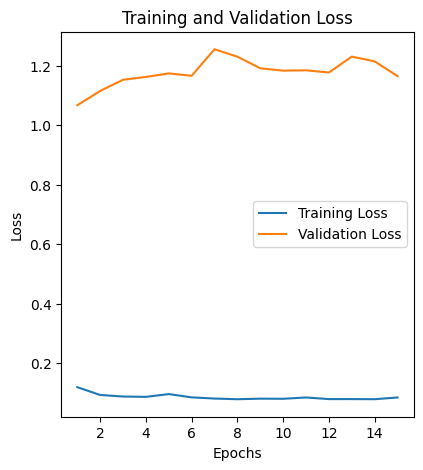

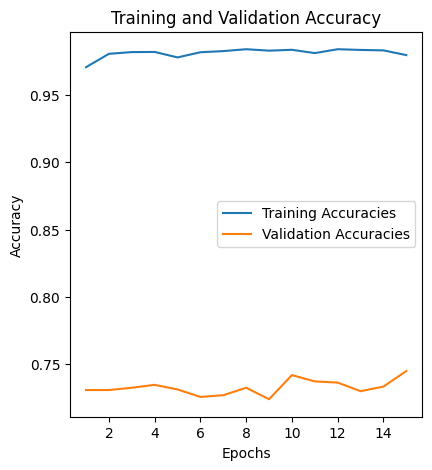

Test Loss: 1.1364, Test Accuracy: 75.3415
Setup  10    Learning rate: 0.01     Number of epochs: 15     Momentum: 0.9
Epoch 1/15, Learning Rate: 0.01, Momentum: 0.9, Train Loss: 0.1114, Train Accuracy: 0.9699, Val Loss: 1.0704, Val Accuracy: 0.7418
Epoch 2/15, Learning Rate: 0.01, Momentum: 0.9, Train Loss: 0.1146, Train Accuracy: 0.9683, Val Loss: 1.0957, Val Accuracy: 0.7239
Epoch 3/15, Learning Rate: 0.01, Momentum: 0.9, Train Loss: 0.1336, Train Accuracy: 0.9614, Val Loss: 1.1200, Val Accuracy: 0.7298
Epoch 4/15, Learning Rate: 0.01, Momentum: 0.9, Train Loss: 0.1220, Train Accuracy: 0.9669, Val Loss: 1.0290, Val Accuracy: 0.7303
Epoch 5/15, Learning Rate: 0.01, Momentum: 0.9, Train Loss: 0.1080, Train Accuracy: 0.9720, Val Loss: 1.1340, Val Accuracy: 0.7362
Epoch 6/15, Learning Rate: 0.01, Momentum: 0.9, Train Loss: 0.1006, Train Accuracy: 0.9752, Val Loss: 1.1574, Val Accuracy: 0.7256
Epoch 7/15, Learning Rate: 0.01, Momentum: 0.9, Train Loss: 0.1219, Train Accuracy: 0.9664, Val 

<Figure size 1000x600 with 0 Axes>

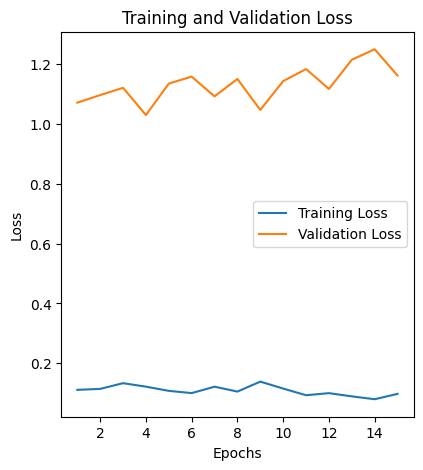

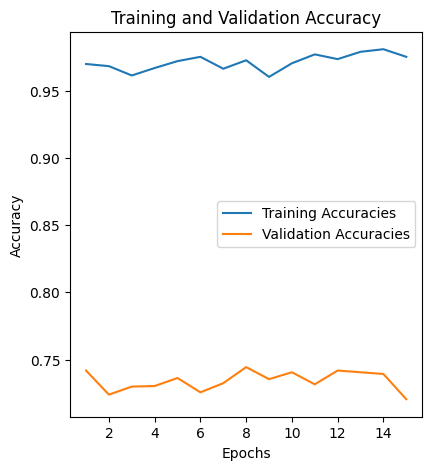

Test Loss: 1.1104, Test Accuracy: 73.3607
Setup  11    Learning rate: 0.01     Number of epochs: 20     Momentum: 0.8
Epoch 1/20, Learning Rate: 0.01, Momentum: 0.8, Train Loss: 0.0757, Train Accuracy: 0.9826, Val Loss: 1.2145, Val Accuracy: 0.7443
Epoch 2/20, Learning Rate: 0.01, Momentum: 0.8, Train Loss: 0.0606, Train Accuracy: 0.9868, Val Loss: 1.2897, Val Accuracy: 0.7384
Epoch 3/20, Learning Rate: 0.01, Momentum: 0.8, Train Loss: 0.0594, Train Accuracy: 0.9869, Val Loss: 1.3172, Val Accuracy: 0.7298
Epoch 4/20, Learning Rate: 0.01, Momentum: 0.8, Train Loss: 0.0568, Train Accuracy: 0.9869, Val Loss: 1.3816, Val Accuracy: 0.7226
Epoch 5/20, Learning Rate: 0.01, Momentum: 0.8, Train Loss: 0.0654, Train Accuracy: 0.9848, Val Loss: 1.2925, Val Accuracy: 0.7409
Epoch 6/20, Learning Rate: 0.01, Momentum: 0.8, Train Loss: 0.0543, Train Accuracy: 0.9879, Val Loss: 1.3122, Val Accuracy: 0.7401
Epoch 7/20, Learning Rate: 0.01, Momentum: 0.8, Train Loss: 0.0599, Train Accuracy: 0.9862, Val 

<Figure size 1000x600 with 0 Axes>

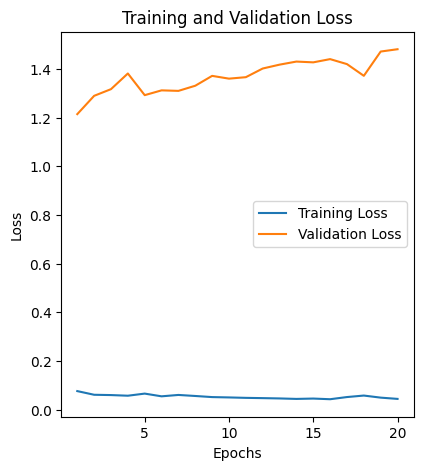

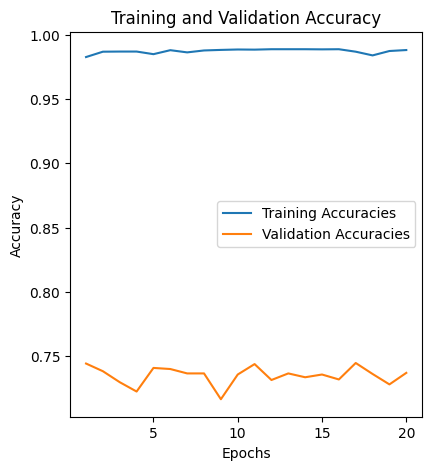

Test Loss: 1.3876, Test Accuracy: 74.2145
Setup  12    Learning rate: 0.01     Number of epochs: 20     Momentum: 0.9
Epoch 1/20, Learning Rate: 0.01, Momentum: 0.9, Train Loss: 0.0745, Train Accuracy: 0.9792, Val Loss: 1.0687, Val Accuracy: 0.7247
Epoch 2/20, Learning Rate: 0.01, Momentum: 0.9, Train Loss: 0.0976, Train Accuracy: 0.9717, Val Loss: 1.1776, Val Accuracy: 0.7401
Epoch 3/20, Learning Rate: 0.01, Momentum: 0.9, Train Loss: 0.0704, Train Accuracy: 0.9803, Val Loss: 1.3617, Val Accuracy: 0.7392
Epoch 4/20, Learning Rate: 0.01, Momentum: 0.9, Train Loss: 0.0867, Train Accuracy: 0.9766, Val Loss: 1.2468, Val Accuracy: 0.7443
Epoch 5/20, Learning Rate: 0.01, Momentum: 0.9, Train Loss: 0.0899, Train Accuracy: 0.9742, Val Loss: 1.2050, Val Accuracy: 0.7358
Epoch 6/20, Learning Rate: 0.01, Momentum: 0.9, Train Loss: 0.0731, Train Accuracy: 0.9792, Val Loss: 1.3056, Val Accuracy: 0.7418
Epoch 7/20, Learning Rate: 0.01, Momentum: 0.9, Train Loss: 0.0596, Train Accuracy: 0.9844, Val 

<Figure size 1000x600 with 0 Axes>

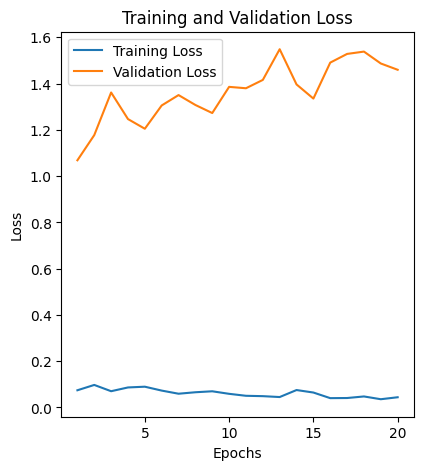

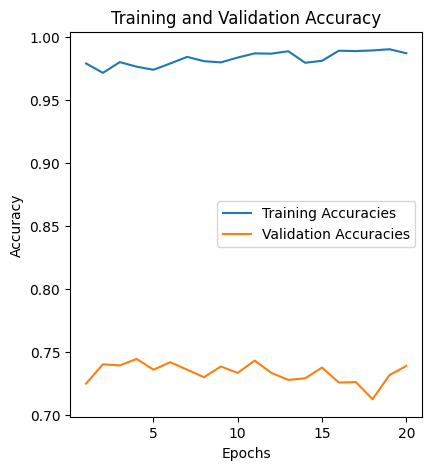

Test Loss: 1.3987, Test Accuracy: 75.1366
Setup  13    Learning rate: 0.005     Number of epochs: 10     Momentum: 0.8
Epoch 1/10, Learning Rate: 0.005, Momentum: 0.8, Train Loss: 0.0361, Train Accuracy: 0.9906, Val Loss: 1.4773, Val Accuracy: 0.7341
Epoch 2/10, Learning Rate: 0.005, Momentum: 0.8, Train Loss: 0.0308, Train Accuracy: 0.9918, Val Loss: 1.5069, Val Accuracy: 0.7384
Epoch 3/10, Learning Rate: 0.005, Momentum: 0.8, Train Loss: 0.0290, Train Accuracy: 0.9925, Val Loss: 1.5203, Val Accuracy: 0.7345
Epoch 4/10, Learning Rate: 0.005, Momentum: 0.8, Train Loss: 0.0284, Train Accuracy: 0.9922, Val Loss: 1.5298, Val Accuracy: 0.7371
Epoch 5/10, Learning Rate: 0.005, Momentum: 0.8, Train Loss: 0.0275, Train Accuracy: 0.9925, Val Loss: 1.5532, Val Accuracy: 0.7362
Epoch 6/10, Learning Rate: 0.005, Momentum: 0.8, Train Loss: 0.0270, Train Accuracy: 0.9926, Val Loss: 1.5654, Val Accuracy: 0.7375
Epoch 7/10, Learning Rate: 0.005, Momentum: 0.8, Train Loss: 0.0268, Train Accuracy: 0.99

<Figure size 1000x600 with 0 Axes>

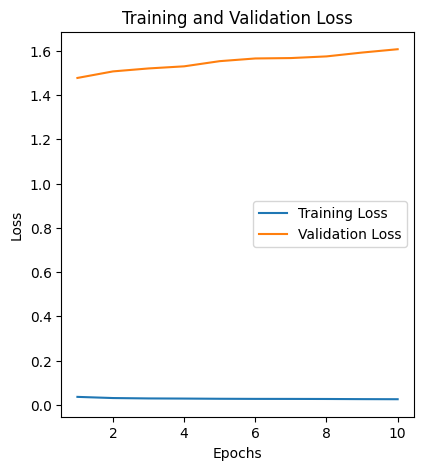

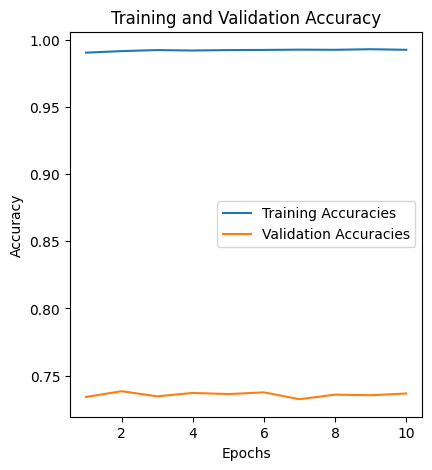

Test Loss: 1.5023, Test Accuracy: 75.0000
Setup  14    Learning rate: 0.005     Number of epochs: 10     Momentum: 0.9
Epoch 1/10, Learning Rate: 0.005, Momentum: 0.9, Train Loss: 0.0254, Train Accuracy: 0.9932, Val Loss: 1.6369, Val Accuracy: 0.7328
Epoch 2/10, Learning Rate: 0.005, Momentum: 0.9, Train Loss: 0.0264, Train Accuracy: 0.9925, Val Loss: 1.5909, Val Accuracy: 0.7350
Epoch 3/10, Learning Rate: 0.005, Momentum: 0.9, Train Loss: 0.0251, Train Accuracy: 0.9924, Val Loss: 1.6316, Val Accuracy: 0.7345
Epoch 4/10, Learning Rate: 0.005, Momentum: 0.9, Train Loss: 0.0247, Train Accuracy: 0.9927, Val Loss: 1.6457, Val Accuracy: 0.7294
Epoch 5/10, Learning Rate: 0.005, Momentum: 0.9, Train Loss: 0.0246, Train Accuracy: 0.9933, Val Loss: 1.6561, Val Accuracy: 0.7303
Epoch 6/10, Learning Rate: 0.005, Momentum: 0.9, Train Loss: 0.0238, Train Accuracy: 0.9934, Val Loss: 1.6606, Val Accuracy: 0.7345
Epoch 7/10, Learning Rate: 0.005, Momentum: 0.9, Train Loss: 0.0243, Train Accuracy: 0.99

<Figure size 1000x600 with 0 Axes>

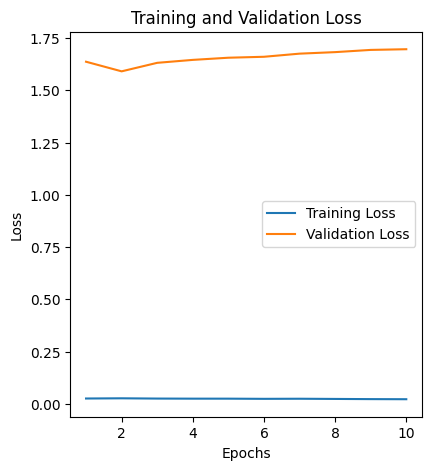

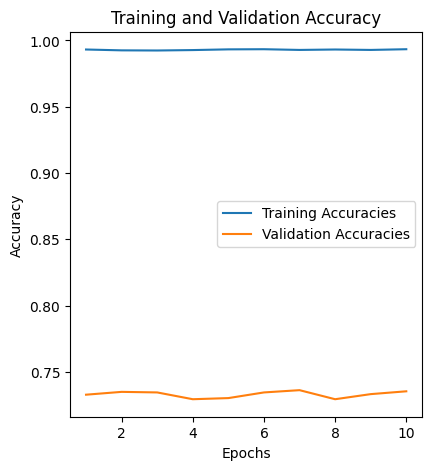

Test Loss: 1.5798, Test Accuracy: 75.0000
Setup  15    Learning rate: 0.005     Number of epochs: 15     Momentum: 0.8
Epoch 1/15, Learning Rate: 0.005, Momentum: 0.8, Train Loss: 0.0214, Train Accuracy: 0.9935, Val Loss: 1.7144, Val Accuracy: 0.7350
Epoch 2/15, Learning Rate: 0.005, Momentum: 0.8, Train Loss: 0.0206, Train Accuracy: 0.9942, Val Loss: 1.7287, Val Accuracy: 0.7328
Epoch 3/15, Learning Rate: 0.005, Momentum: 0.8, Train Loss: 0.0201, Train Accuracy: 0.9939, Val Loss: 1.7394, Val Accuracy: 0.7315
Epoch 4/15, Learning Rate: 0.005, Momentum: 0.8, Train Loss: 0.0203, Train Accuracy: 0.9941, Val Loss: 1.7452, Val Accuracy: 0.7341
Epoch 5/15, Learning Rate: 0.005, Momentum: 0.8, Train Loss: 0.0198, Train Accuracy: 0.9944, Val Loss: 1.7519, Val Accuracy: 0.7307
Epoch 6/15, Learning Rate: 0.005, Momentum: 0.8, Train Loss: 0.0194, Train Accuracy: 0.9946, Val Loss: 1.7691, Val Accuracy: 0.7358
Epoch 7/15, Learning Rate: 0.005, Momentum: 0.8, Train Loss: 0.0192, Train Accuracy: 0.99

<Figure size 1000x600 with 0 Axes>

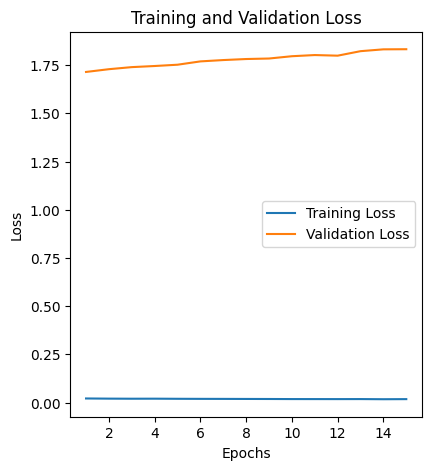

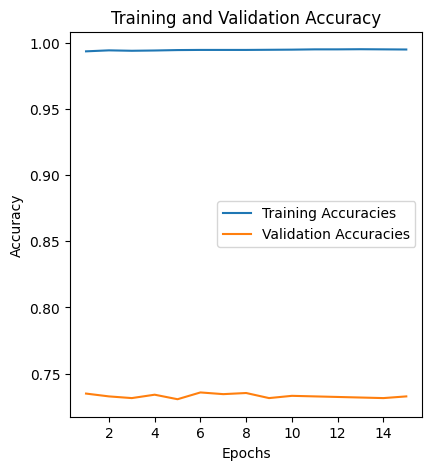

Test Loss: 1.7153, Test Accuracy: 74.7609
Setup  16    Learning rate: 0.005     Number of epochs: 15     Momentum: 0.9
Epoch 1/15, Learning Rate: 0.005, Momentum: 0.9, Train Loss: 0.0187, Train Accuracy: 0.9944, Val Loss: 1.8415, Val Accuracy: 0.7286
Epoch 2/15, Learning Rate: 0.005, Momentum: 0.9, Train Loss: 0.0200, Train Accuracy: 0.9946, Val Loss: 1.8521, Val Accuracy: 0.7281
Epoch 3/15, Learning Rate: 0.005, Momentum: 0.9, Train Loss: 0.0231, Train Accuracy: 0.9932, Val Loss: 1.8630, Val Accuracy: 0.7277
Epoch 4/15, Learning Rate: 0.005, Momentum: 0.9, Train Loss: 0.0234, Train Accuracy: 0.9934, Val Loss: 1.8133, Val Accuracy: 0.7350
Epoch 5/15, Learning Rate: 0.005, Momentum: 0.9, Train Loss: 0.0226, Train Accuracy: 0.9931, Val Loss: 1.8555, Val Accuracy: 0.7204
Epoch 6/15, Learning Rate: 0.005, Momentum: 0.9, Train Loss: 0.0209, Train Accuracy: 0.9938, Val Loss: 1.8060, Val Accuracy: 0.7281
Epoch 7/15, Learning Rate: 0.005, Momentum: 0.9, Train Loss: 0.0195, Train Accuracy: 0.99

<Figure size 1000x600 with 0 Axes>

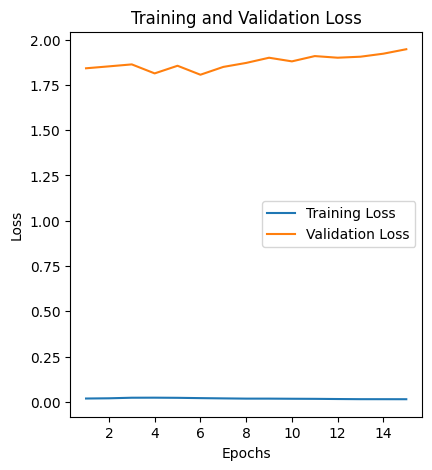

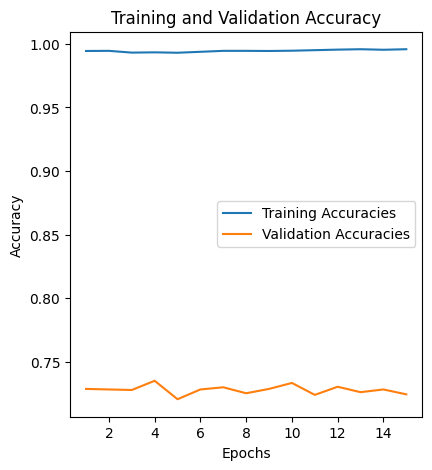

Test Loss: 1.8279, Test Accuracy: 73.9754
Setup  17    Learning rate: 0.005     Number of epochs: 20     Momentum: 0.8
Epoch 1/20, Learning Rate: 0.005, Momentum: 0.8, Train Loss: 0.0139, Train Accuracy: 0.9963, Val Loss: 1.9632, Val Accuracy: 0.7243
Epoch 2/20, Learning Rate: 0.005, Momentum: 0.8, Train Loss: 0.0134, Train Accuracy: 0.9961, Val Loss: 1.9630, Val Accuracy: 0.7260
Epoch 3/20, Learning Rate: 0.005, Momentum: 0.8, Train Loss: 0.0132, Train Accuracy: 0.9959, Val Loss: 1.9679, Val Accuracy: 0.7243
Epoch 4/20, Learning Rate: 0.005, Momentum: 0.8, Train Loss: 0.0129, Train Accuracy: 0.9962, Val Loss: 1.9850, Val Accuracy: 0.7243
Epoch 5/20, Learning Rate: 0.005, Momentum: 0.8, Train Loss: 0.0124, Train Accuracy: 0.9963, Val Loss: 1.9926, Val Accuracy: 0.7243
Epoch 6/20, Learning Rate: 0.005, Momentum: 0.8, Train Loss: 0.0127, Train Accuracy: 0.9962, Val Loss: 1.9922, Val Accuracy: 0.7251
Epoch 7/20, Learning Rate: 0.005, Momentum: 0.8, Train Loss: 0.0124, Train Accuracy: 0.99

<Figure size 1000x600 with 0 Axes>

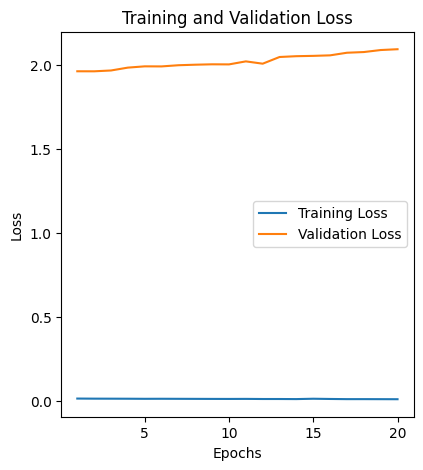

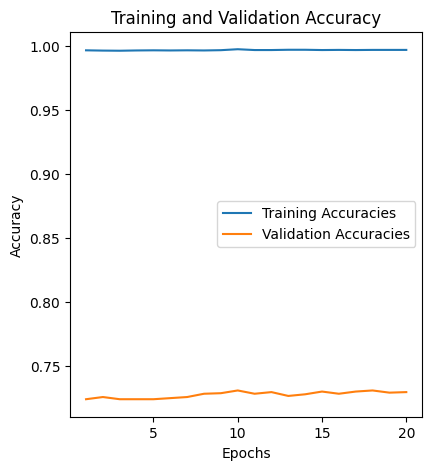

Test Loss: 1.9841, Test Accuracy: 73.7705
Setup  18    Learning rate: 0.005     Number of epochs: 20     Momentum: 0.9
Epoch 1/20, Learning Rate: 0.005, Momentum: 0.9, Train Loss: 0.0127, Train Accuracy: 0.9968, Val Loss: 2.1009, Val Accuracy: 0.7290
Epoch 2/20, Learning Rate: 0.005, Momentum: 0.9, Train Loss: 0.0125, Train Accuracy: 0.9965, Val Loss: 2.0858, Val Accuracy: 0.7337
Epoch 3/20, Learning Rate: 0.005, Momentum: 0.9, Train Loss: 0.0127, Train Accuracy: 0.9963, Val Loss: 2.0940, Val Accuracy: 0.7281
Epoch 4/20, Learning Rate: 0.005, Momentum: 0.9, Train Loss: 0.0118, Train Accuracy: 0.9964, Val Loss: 2.0876, Val Accuracy: 0.7307
Epoch 5/20, Learning Rate: 0.005, Momentum: 0.9, Train Loss: 0.0160, Train Accuracy: 0.9954, Val Loss: 2.0936, Val Accuracy: 0.7290
Epoch 6/20, Learning Rate: 0.005, Momentum: 0.9, Train Loss: 0.0171, Train Accuracy: 0.9948, Val Loss: 2.0873, Val Accuracy: 0.7264
Epoch 7/20, Learning Rate: 0.005, Momentum: 0.9, Train Loss: 0.0150, Train Accuracy: 0.99

<Figure size 1000x600 with 0 Axes>

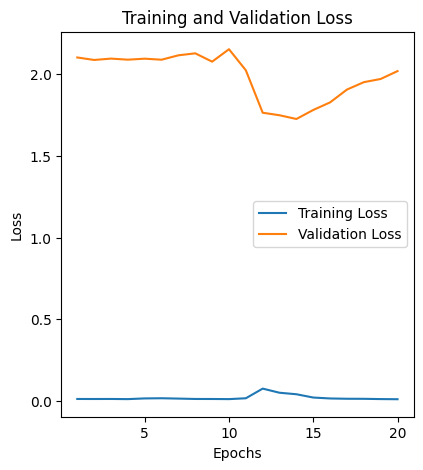

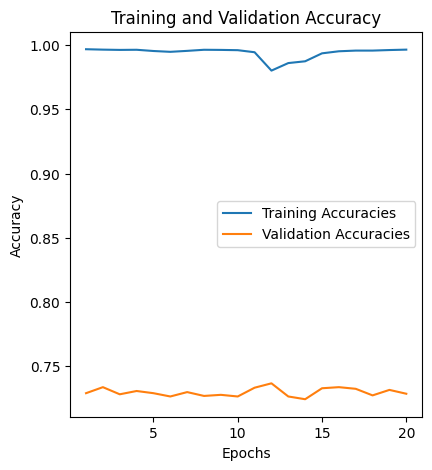

Test Loss: 1.8765, Test Accuracy: 74.9658


In [7]:
X = data['text'].values
y = data['airline_sentiment'].values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

tokenizer = get_tokenizer('basic_english')
counter = Counter()
min_freq = 1
for text in X:
    counter.update(tokenizer(text))
vocab_list = [token for token, freq in counter.items() if freq >= min_freq]
vocab = {token: idx for idx, token in enumerate(vocab_list)}

X = [[vocab[token] for token in tokenizer(text) if token in vocab] for text in X]

max_len = max([len(x) for x in X])
X = [x[:max_len] + [0]*(max_len-len(x)) for x in X]

X = torch.tensor(X)
y = torch.tensor(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

class BasicLSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim,num_layers):
        super(BasicLSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_output, _ = self.lstm(embedded)
        lstm_output = lstm_output[:, -1, :]
        output = self.fc(lstm_output)
        return output

all_text = ' '.join(data['text'])
words = word_tokenize(all_text)
word_counts = Counter(words)
vocab = sorted(word_counts, key=word_counts.get, reverse=True)
voc_2_int = {word: index+1 for index, word in enumerate(vocab)}

def encode_text(text):
    return [voc_2_int[word] for word in word_tokenize(text)]

# Define model parameters
vocab_size = len(voc_2_int) + 1  # Add one for padding token
embedding_dim = 100
hidden_dim = 64
output_dim = len(label_encoder.classes_)  # Number of sentiment classes

# Initialize the model
model = BasicLSTMModel(vocab_size, embedding_dim, hidden_dim, output_dim, num_layers=2)

# Step 5: Train LSTM model
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Define data loaders
batch_size = 64

class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = CustomDataset(X_train, y_train)
val_dataset = CustomDataset(X_val, y_val)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Train the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
# Different setups with different hyperparameters(Learning rate,Epochs,Momentum,Optimizer)
list_epochs = [10, 15, 20]
list_learning_rate = [0.005, 0.01, 0.005]
momentum = [0.8,0.9]
count = 0


for lr in list_learning_rate:
    for epochs in list_epochs:
        for m in momentum:
            train_losses = []
            train_accuracies = []
            val_losses = []
            val_accuracies = []
            test_losses = []
            test_accuracies = []
            count += 1
            print("Setup ", count, "   Learning rate:", lr, "    Number of epochs:", epochs, "    Momentum:", m)
            # Define optimizer with different learning rates and momentum for each combination
            optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=m)

            # Reset best validation loss for each combination
            best_val_loss = float('inf')

            for epoch in range(epochs):
                model.train()
                running_loss = 0.0
                correct = 0
                total = 0
                for inputs, labels in train_loader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    optimizer.zero_grad()
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    loss.backward()
                    optimizer.step()
                    running_loss += loss.item() * inputs.size(0)
                    _, predicted = torch.max(outputs, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()
                train_loss = running_loss / len(train_loader.dataset)
                train_accuracy = correct / total

                train_losses.append(train_loss)
                train_accuracies.append(train_accuracy)

                # Evaluate on validation set
                model.eval()
                val_loss = 0.0
                correct = 0
                total = 0
                with torch.no_grad():
                    for inputs, labels in val_loader:
                        inputs, labels = inputs.to(device), labels.to(device)
                        outputs = model(inputs)
                        loss = criterion(outputs, labels)
                        val_loss += loss.item() * inputs.size(0)
                        _, predicted = torch.max(outputs, 1)
                        total += labels.size(0)
                        correct += (predicted == labels).sum().item()
                val_loss = val_loss / len(val_loader.dataset)
                val_accuracy = correct / total

                val_losses.append(val_loss)
                val_accuracies.append(val_accuracy)



                print(f'Epoch {epoch+1}/{epochs}, Learning Rate: {lr}, Momentum: {m}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')

                # Save the best model
                if val_loss < best_val_loss:
                    best_val_loss = val_loss
                    torch.save(model.state_dict(), f'best_lstm_model_lr{lr}_epochs{epochs}_momentum{m}.h5')
            # Testing the model
            plt.figure(figsize=(10, 6))
            # Plotting training and validation metrics
            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
            plt.plot(range(1, epochs+1), val_losses, label='Validation Loss')
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.title('Training and Validation Loss')
            plt.legend()
            plt.show()

            # Plotting training and validation metrics
            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            plt.plot(range(1, epochs+1), train_accuracies, label='Training Accuracies')
            plt.plot(range(1, epochs+1), val_accuracies, label='Validation Accuracies')
            plt.xlabel('Epochs')
            plt.ylabel('Accuracy')
            plt.title('Training and Validation Accuracy')
            plt.legend()
            plt.show()

            test_loss = 0.0
            correct = 0
            total = 0
            model.eval()
            predictions = []
            true_labels = []
            test_dataset = CustomDataset(X_test, y_test)
            test_loader = DataLoader(test_dataset, batch_size=batch_size)
            with torch.no_grad():
                for inputs, labels in test_loader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    test_loss += loss.item() * inputs.size(0)
                    _, predicted = torch.max(outputs, 1)
                    predictions.extend(predicted.tolist())
                    true_labels.extend(labels.tolist())
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()

            # Calculate test loss and accuracy
            test_loss = test_loss / len(test_loader.dataset)
            test_accuracy = correct / total
            print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {(test_accuracy)*100:.4f}')
            predictions = label_encoder.inverse_transform(predictions)
            true_labels = label_encoder.inverse_transform(true_labels)





In [8]:
# Hyper parameter Tuning (Changing the optimizer from SGD to Adam)
# Step 5: Training the LSTM model
# Defining the loss function and Adam optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Define data loaders
batch_size = 32

class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = CustomDataset(X_train, y_train)
val_dataset = CustomDataset(X_val, y_val)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Training
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

num_epochs = 10
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
test_losses = []
test_accuracies = []
best_val_loss = float('inf')
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    train_loss = running_loss / len(train_loader.dataset)
    train_accuracy = correct / total
    train_accuracies.append(train_accuracy)
    train_losses.append(train_loss)

    # Validation
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_loss = val_loss / len(val_loader.dataset)
    val_accuracy = correct / total
    val_accuracies.append(val_accuracy)
    val_losses.append(val_loss)


    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')

    # Save the best model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_lstm_model.h5')


Epoch 1/10, Train Loss: 0.0552, Train Accuracy: 0.9843, Val Loss: 1.5268, Val Accuracy: 0.7315
Epoch 2/10, Train Loss: 0.0586, Train Accuracy: 0.9833, Val Loss: 1.4722, Val Accuracy: 0.7264
Epoch 3/10, Train Loss: 0.0489, Train Accuracy: 0.9868, Val Loss: 1.3783, Val Accuracy: 0.7388
Epoch 4/10, Train Loss: 0.0382, Train Accuracy: 0.9880, Val Loss: 1.6700, Val Accuracy: 0.7461
Epoch 5/10, Train Loss: 0.0391, Train Accuracy: 0.9879, Val Loss: 1.6070, Val Accuracy: 0.7379
Epoch 6/10, Train Loss: 0.0625, Train Accuracy: 0.9800, Val Loss: 1.4673, Val Accuracy: 0.7179
Epoch 7/10, Train Loss: 0.0527, Train Accuracy: 0.9841, Val Loss: 1.4707, Val Accuracy: 0.7371
Epoch 8/10, Train Loss: 0.0398, Train Accuracy: 0.9898, Val Loss: 1.4594, Val Accuracy: 0.7337
Epoch 9/10, Train Loss: 0.0262, Train Accuracy: 0.9908, Val Loss: 1.6534, Val Accuracy: 0.7315
Epoch 10/10, Train Loss: 0.0335, Train Accuracy: 0.9887, Val Loss: 1.7080, Val Accuracy: 0.7324


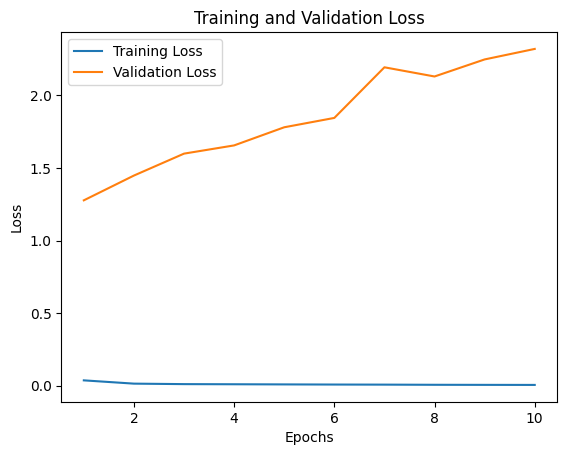

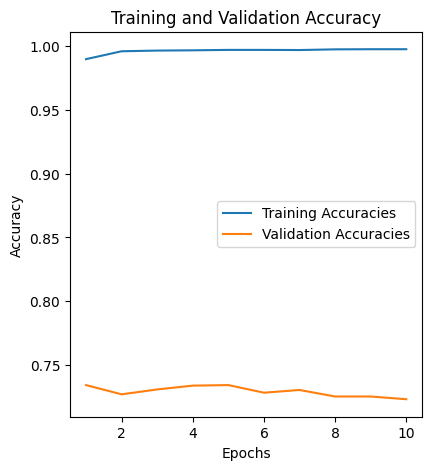

In [14]:
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_accuracies, label='Training Accuracies')
plt.plot(range(1, num_epochs+1), val_accuracies, label='Validation Accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

Test Loss: 0.1626, Test Accuracy: 77.2145


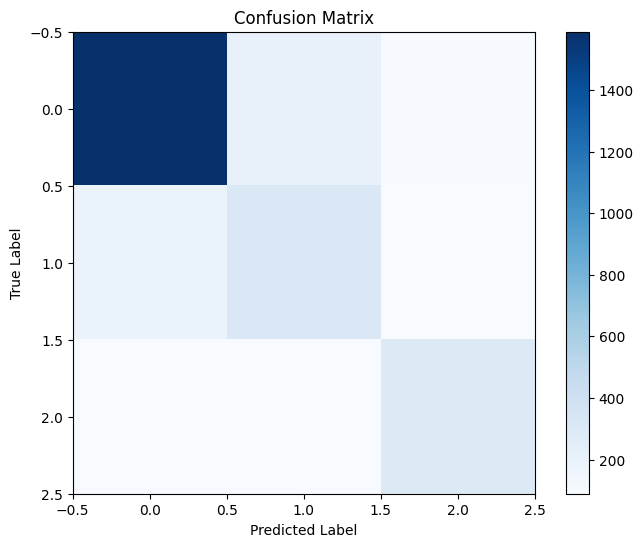

In [19]:
test_loss = 0.0
correct = 0
total = 0
model.eval()
predictions = []
true_labels = []
test_dataset = CustomDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size)
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        predictions.extend(predicted.tolist())
        true_labels.extend(labels.tolist())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate test loss and accuracy
test_loss = test_loss / len(test_loader.dataset)
test_accuracy = correct / total

print(f'Test Loss: {(test_loss):.4f}, Test Accuracy: {(test_accuracy)*100:.4f}')

# Convert predictions and true labels back to original class labels
predictions = label_encoder.inverse_transform(predictions)
true_labels = label_encoder.inverse_transform(true_labels)

# Report the classification report
from sklearn.metrics import classification_report

cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [23]:
# Step 6: Build an improved LSTM: Bidirectional LSTM (Using Adam Optimizer)
class ImprovedBiLSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, num_layers):
        super(ImprovedBiLSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)  # Multiply by 2 because of bidirectional LSTM

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_output, _ = self.lstm(embedded)
        lstm_output = lstm_output[:, -1, :]  # Take the last output
        output = self.fc(lstm_output)
        return output


# Initialize the Bidirectional LSTM model
bilstm_model = ImprovedBiLSTMModel(vocab_size, embedding_dim, hidden_dim, output_dim, num_layers=2)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(bi_lstm_model.parameters(), lr=0.001)  # One setup with Adam Optimizer

# Train the Bidirectional LSTM model
bi_lstm_model.to(device)

best_bi_lstm = float('inf')
for epoch in range(num_epochs):
    bi_lstm_model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = bi_lstm_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_accuracy = correct / total

    # Evaluate on validation set
    bi_lstm_model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = bi_lstm_model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_loss = val_loss / len(val_loader.dataset)
    val_accuracy = correct / total

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')

    # Save the best model
    if val_loss < best_bi_lstm:
        best_bi_lstm = val_loss
        torch.save(bi_lstm_model.state_dict(), 'best_bi_lstm_model.pickle')


Epoch 1/10, Train Loss: 0.9019, Train Accuracy: 0.6206, Val Loss: 0.8632, Val Accuracy: 0.6112
Epoch 2/10, Train Loss: 0.7373, Train Accuracy: 0.6750, Val Loss: 0.7230, Val Accuracy: 0.7093
Epoch 3/10, Train Loss: 0.6015, Train Accuracy: 0.7587, Val Loss: 0.6674, Val Accuracy: 0.7311
Epoch 4/10, Train Loss: 0.5119, Train Accuracy: 0.8067, Val Loss: 0.6557, Val Accuracy: 0.7315
Epoch 5/10, Train Loss: 0.4261, Train Accuracy: 0.8456, Val Loss: 0.6673, Val Accuracy: 0.7482
Epoch 6/10, Train Loss: 0.3690, Train Accuracy: 0.8706, Val Loss: 0.6689, Val Accuracy: 0.7580
Epoch 7/10, Train Loss: 0.3128, Train Accuracy: 0.8919, Val Loss: 0.7039, Val Accuracy: 0.7601
Epoch 8/10, Train Loss: 0.2515, Train Accuracy: 0.9181, Val Loss: 0.7276, Val Accuracy: 0.7512
Epoch 9/10, Train Loss: 0.2075, Train Accuracy: 0.9345, Val Loss: 0.8648, Val Accuracy: 0.7550
Epoch 10/10, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 0.9358, Val Accuracy: 0.7397


In [24]:
from sklearn.metrics import classification_report
# Testing the Bidirectional LSTM model
bilstm_model.eval()
test_loss = 0.0
correct = 0
total = 0
predictions_bi_lstm = []
true_labels_bi_lstm = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = bilstm_model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        predictions_bi_lstm.extend(predicted.tolist())
        true_labels_bi_lstm.extend(labels.tolist())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate test loss and accuracy
test_loss = test_loss / len(test_loader.dataset)
test_accuracy = correct / total

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy*100:.4f}')

# Convert predictions and true labels back to original class labels
predictions_bi_lstm = label_encoder.inverse_transform(predictions_bi_lstm)
true_labels_bi_lstm = label_encoder.inverse_transform(true_labels_bi_lstm)

print("Classification Report for Bidirectional LSTM Model:")
print(classification_report(true_labels_bi_lstm, predictions_bi_lstm))


Test Loss: 0.8381, Test Accuracy: 76.4003
Classification Report for Bidirectional LSTM Model:
              precision    recall  f1-score   support

    negative       0.88      0.84      0.86      1889
     neutral       0.51      0.63      0.56       580
    positive       0.70      0.63      0.67       459

    accuracy                           0.76      2928
   macro avg       0.70      0.70      0.70      2928
weighted avg       0.78      0.76      0.77      2928



Setup  73    Learning rate: 0.005     Number of epochs: 20     Momentum: 0.8
Training for num_epochs=10, lr=0.005, momentum=0.8
Epoch 1/10, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.5539, Val Accuracy: 0.7222
Epoch 2/10, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.5595, Val Accuracy: 0.7226
Epoch 3/10, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.5607, Val Accuracy: 0.7213
Epoch 4/10, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.5647, Val Accuracy: 0.7209
Epoch 5/10, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.5646, Val Accuracy: 0.7230
Epoch 6/10, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.5659, Val Accuracy: 0.7217
Epoch 7/10, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.5686, Val Accuracy: 0.7234
Epoch 8/10, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.5696, Val Accuracy: 0.7243
Epoch 9/10, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.5735, Val Accuracy: 0.7251
Epoch 10/10, Trai

<Figure size 1000x600 with 0 Axes>

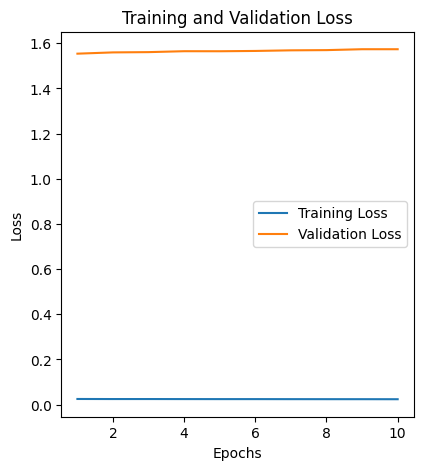

Test Loss: 1.4365, Test Accuracy: 76.5902
Classification Report for Bidirectional LSTM Model:
              precision    recall  f1-score   support

    negative       0.88      0.83      0.85      1889
     neutral       0.52      0.55      0.54       580
    positive       0.57      0.66      0.61       459

    accuracy                           0.75      2928
   macro avg       0.66      0.68      0.67      2928
weighted avg       0.76      0.75      0.75      2928

Setup  74    Learning rate: 0.005     Number of epochs: 20     Momentum: 0.9
Training for num_epochs=10, lr=0.005, momentum=0.9
Epoch 1/10, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.5809, Val Accuracy: 0.7268
Epoch 2/10, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.5708, Val Accuracy: 0.7286
Epoch 3/10, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.5772, Val Accuracy: 0.7294
Epoch 4/10, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.5653, Val Accuracy: 0.7281
Epoch 5/10, Train

<Figure size 1000x600 with 0 Axes>

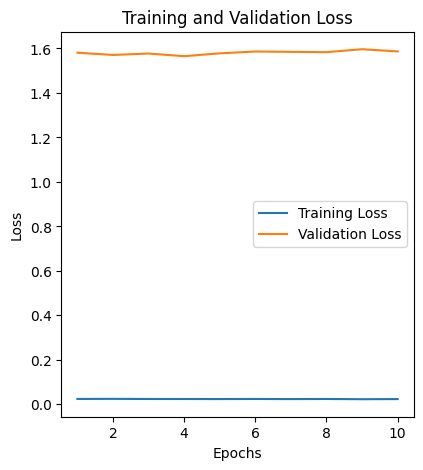

Test Loss: 1.4541, Test Accuracy: 75.6339
Classification Report for Bidirectional LSTM Model:
              precision    recall  f1-score   support

    negative       0.89      0.80      0.84      1889
     neutral       0.51      0.57      0.54       580
    positive       0.55      0.68      0.61       459

    accuracy                           0.74      2928
   macro avg       0.65      0.68      0.66      2928
weighted avg       0.76      0.74      0.74      2928

Setup  75    Learning rate: 0.01     Number of epochs: 20     Momentum: 0.8
Training for num_epochs=10, lr=0.01, momentum=0.8
Epoch 1/10, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.5918, Val Accuracy: 0.7209
Epoch 2/10, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.5974, Val Accuracy: 0.7209
Epoch 3/10, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.5992, Val Accuracy: 0.7239
Epoch 4/10, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.5940, Val Accuracy: 0.7234
Epoch 5/10, Train L

<Figure size 1000x600 with 0 Axes>

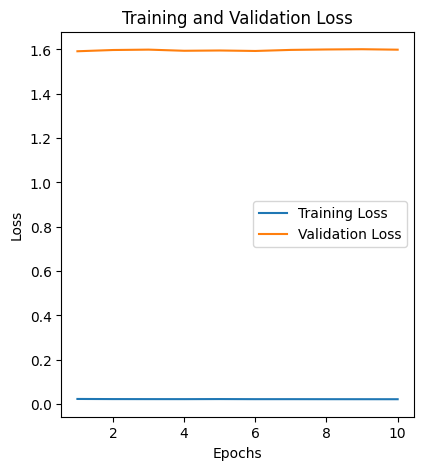

Test Loss: 1.4765, Test Accuracy: 76.2486
Classification Report for Bidirectional LSTM Model:
              precision    recall  f1-score   support

    negative       0.88      0.83      0.85      1889
     neutral       0.52      0.54      0.53       580
    positive       0.55      0.66      0.60       459

    accuracy                           0.74      2928
   macro avg       0.65      0.67      0.66      2928
weighted avg       0.75      0.74      0.75      2928

Setup  76    Learning rate: 0.01     Number of epochs: 20     Momentum: 0.9
Training for num_epochs=10, lr=0.01, momentum=0.9
Epoch 1/10, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.5999, Val Accuracy: 0.7315
Epoch 2/10, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.5660, Val Accuracy: 0.7179
Epoch 3/10, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.3962, Val Accuracy: 0.7345
Epoch 4/10, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.4526, Val Accuracy: 0.7298
Epoch 5/10, Train L

<Figure size 1000x600 with 0 Axes>

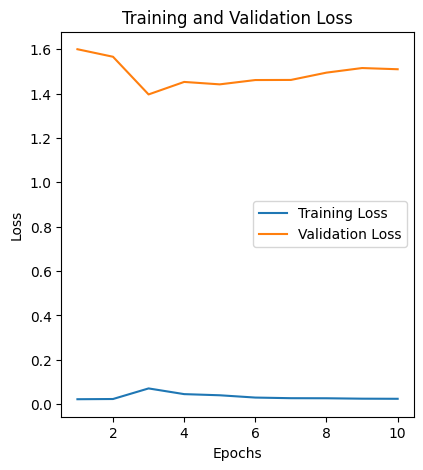

Test Loss: 1.3812, Test Accuracy: 76.3169
Classification Report for Bidirectional LSTM Model:
              precision    recall  f1-score   support

    negative       0.88      0.82      0.85      1889
     neutral       0.52      0.54      0.53       580
    positive       0.56      0.67      0.61       459

    accuracy                           0.74      2928
   macro avg       0.65      0.68      0.66      2928
weighted avg       0.76      0.74      0.75      2928

Setup  77    Learning rate: 0.005     Number of epochs: 20     Momentum: 0.8
Training for num_epochs=10, lr=0.005, momentum=0.8
Epoch 1/10, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.5254, Val Accuracy: 0.7247
Epoch 2/10, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.5307, Val Accuracy: 0.7260
Epoch 3/10, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.5314, Val Accuracy: 0.7277
Epoch 4/10, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.5340, Val Accuracy: 0.7286
Epoch 5/10, Train

<Figure size 1000x600 with 0 Axes>

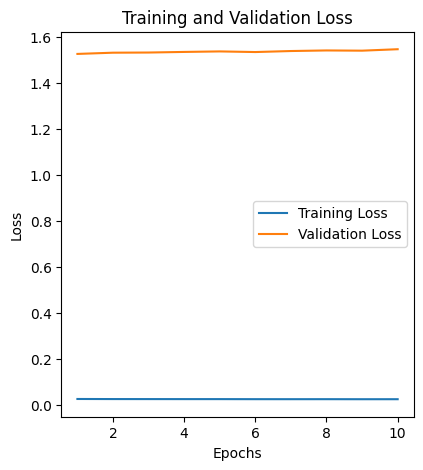

Test Loss: 1.4179, Test Accuracy: 76.6243
Classification Report for Bidirectional LSTM Model:
              precision    recall  f1-score   support

    negative       0.87      0.83      0.85      1889
     neutral       0.52      0.54      0.53       580
    positive       0.57      0.67      0.62       459

    accuracy                           0.75      2928
   macro avg       0.66      0.68      0.67      2928
weighted avg       0.76      0.75      0.75      2928

Setup  78    Learning rate: 0.005     Number of epochs: 20     Momentum: 0.9
Training for num_epochs=10, lr=0.005, momentum=0.9
Epoch 1/10, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.5456, Val Accuracy: 0.7268
Epoch 2/10, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.5222, Val Accuracy: 0.7294
Epoch 3/10, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.5301, Val Accuracy: 0.7277
Epoch 4/10, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.5717, Val Accuracy: 0.7268
Epoch 5/10, Train

<Figure size 1000x600 with 0 Axes>

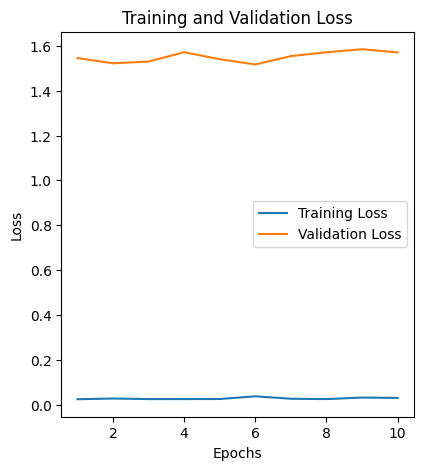

Test Loss: 1.4296, Test Accuracy: 76.6243
Classification Report for Bidirectional LSTM Model:
              precision    recall  f1-score   support

    negative       0.88      0.83      0.85      1889
     neutral       0.53      0.53      0.53       580
    positive       0.56      0.69      0.62       459

    accuracy                           0.75      2928
   macro avg       0.66      0.68      0.67      2928
weighted avg       0.76      0.75      0.75      2928

Setup  79    Learning rate: 0.005     Number of epochs: 20     Momentum: 0.8
Training for num_epochs=15, lr=0.005, momentum=0.8
Epoch 1/15, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.5539, Val Accuracy: 0.7247
Epoch 2/15, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.5514, Val Accuracy: 0.7273
Epoch 3/15, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.5638, Val Accuracy: 0.7268
Epoch 4/15, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.5597, Val Accuracy: 0.7273
Epoch 5/15, Train

<Figure size 1000x600 with 0 Axes>

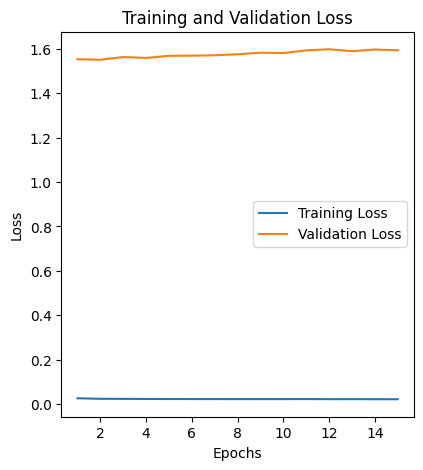

Test Loss: 1.4732, Test Accuracy: 76.3852
Classification Report for Bidirectional LSTM Model:
              precision    recall  f1-score   support

    negative       0.87      0.83      0.85      1889
     neutral       0.52      0.54      0.53       580
    positive       0.56      0.66      0.61       459

    accuracy                           0.74      2928
   macro avg       0.65      0.68      0.66      2928
weighted avg       0.76      0.74      0.75      2928

Setup  80    Learning rate: 0.005     Number of epochs: 20     Momentum: 0.9
Training for num_epochs=15, lr=0.005, momentum=0.9
Epoch 1/15, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.5940, Val Accuracy: 0.7311
Epoch 2/15, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.5927, Val Accuracy: 0.7268
Epoch 3/15, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.5904, Val Accuracy: 0.7290
Epoch 4/15, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.5992, Val Accuracy: 0.7290
Epoch 5/15, Train

<Figure size 1000x600 with 0 Axes>

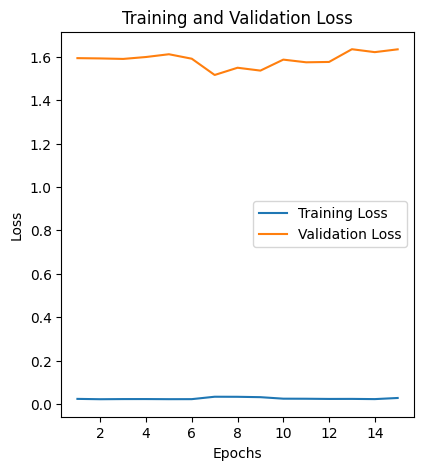

Test Loss: 1.4904, Test Accuracy: 76.1120
Classification Report for Bidirectional LSTM Model:
              precision    recall  f1-score   support

    negative       0.88      0.82      0.85      1889
     neutral       0.52      0.54      0.53       580
    positive       0.55      0.66      0.60       459

    accuracy                           0.74      2928
   macro avg       0.65      0.67      0.66      2928
weighted avg       0.75      0.74      0.75      2928

Setup  81    Learning rate: 0.01     Number of epochs: 20     Momentum: 0.8
Training for num_epochs=15, lr=0.01, momentum=0.8
Epoch 1/15, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.6361, Val Accuracy: 0.7230
Epoch 2/15, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.6390, Val Accuracy: 0.7247
Epoch 3/15, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.6220, Val Accuracy: 0.7239
Epoch 4/15, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.6363, Val Accuracy: 0.7247
Epoch 5/15, Train L

<Figure size 1000x600 with 0 Axes>

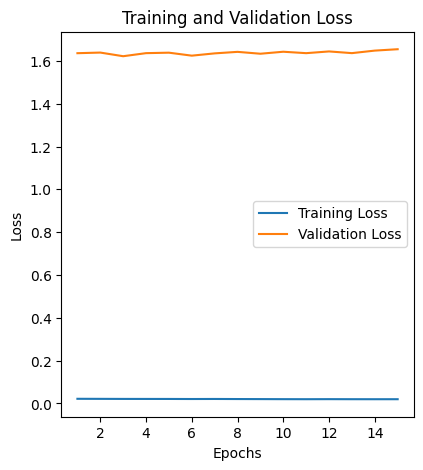

Test Loss: 1.5185, Test Accuracy: 76.7609
Classification Report for Bidirectional LSTM Model:
              precision    recall  f1-score   support

    negative       0.87      0.83      0.85      1889
     neutral       0.52      0.56      0.54       580
    positive       0.59      0.66      0.62       459

    accuracy                           0.75      2928
   macro avg       0.66      0.68      0.67      2928
weighted avg       0.76      0.75      0.75      2928

Setup  82    Learning rate: 0.01     Number of epochs: 20     Momentum: 0.9
Training for num_epochs=15, lr=0.01, momentum=0.9
Epoch 1/15, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.6272, Val Accuracy: 0.7247
Epoch 2/15, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.6482, Val Accuracy: 0.7268
Epoch 3/15, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.6500, Val Accuracy: 0.7222
Epoch 4/15, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.6547, Val Accuracy: 0.7277
Epoch 5/15, Train L

<Figure size 1000x600 with 0 Axes>

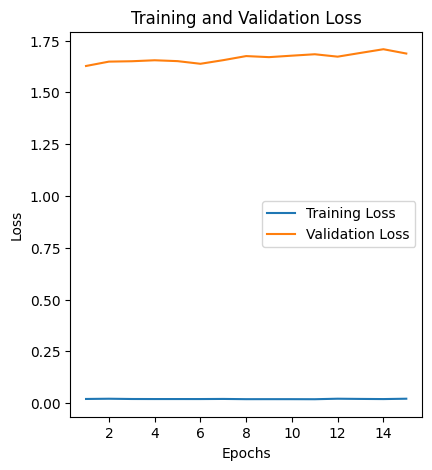

Test Loss: 1.5537, Test Accuracy: 76.3511
Classification Report for Bidirectional LSTM Model:
              precision    recall  f1-score   support

    negative       0.87      0.82      0.85      1889
     neutral       0.51      0.57      0.54       580
    positive       0.58      0.65      0.62       459

    accuracy                           0.74      2928
   macro avg       0.66      0.68      0.67      2928
weighted avg       0.76      0.74      0.75      2928

Setup  83    Learning rate: 0.005     Number of epochs: 20     Momentum: 0.8
Training for num_epochs=15, lr=0.005, momentum=0.8
Epoch 1/15, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.6923, Val Accuracy: 0.7286
Epoch 2/15, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.6913, Val Accuracy: 0.7303
Epoch 3/15, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.7018, Val Accuracy: 0.7307
Epoch 4/15, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.6962, Val Accuracy: 0.7290
Epoch 5/15, Train

<Figure size 1000x600 with 0 Axes>

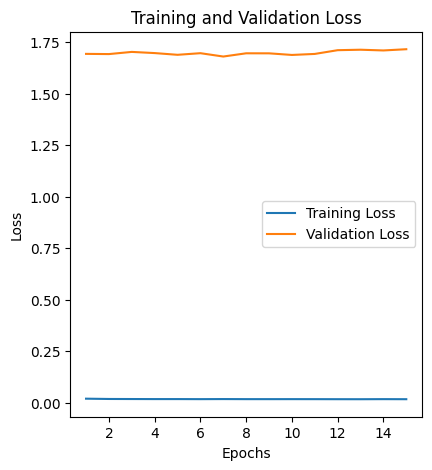

Test Loss: 1.5665, Test Accuracy: 76.7609
Classification Report for Bidirectional LSTM Model:
              precision    recall  f1-score   support

    negative       0.87      0.83      0.85      1889
     neutral       0.52      0.55      0.54       580
    positive       0.58      0.66      0.62       459

    accuracy                           0.75      2928
   macro avg       0.66      0.68      0.67      2928
weighted avg       0.76      0.75      0.75      2928

Setup  84    Learning rate: 0.005     Number of epochs: 20     Momentum: 0.9
Training for num_epochs=15, lr=0.005, momentum=0.9
Epoch 1/15, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.7103, Val Accuracy: 0.7243
Epoch 2/15, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.7386, Val Accuracy: 0.7226
Epoch 3/15, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.7294, Val Accuracy: 0.7226
Epoch 4/15, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.5197, Val Accuracy: 0.7068
Epoch 5/15, Train

<Figure size 1000x600 with 0 Axes>

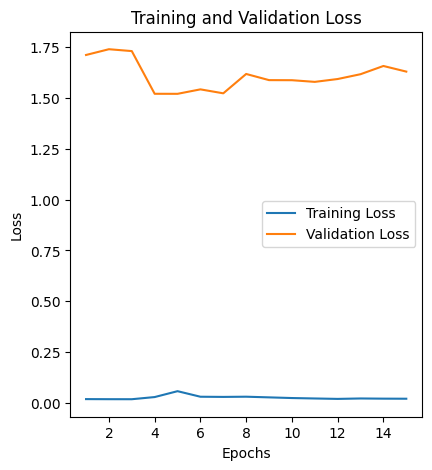

Test Loss: 1.4971, Test Accuracy: 76.3511
Classification Report for Bidirectional LSTM Model:
              precision    recall  f1-score   support

    negative       0.87      0.83      0.85      1889
     neutral       0.53      0.53      0.53       580
    positive       0.55      0.66      0.60       459

    accuracy                           0.74      2928
   macro avg       0.65      0.67      0.66      2928
weighted avg       0.75      0.74      0.75      2928

Setup  85    Learning rate: 0.005     Number of epochs: 20     Momentum: 0.8
Training for num_epochs=20, lr=0.005, momentum=0.8
Epoch 1/20, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.6406, Val Accuracy: 0.7294
Epoch 2/20, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.6567, Val Accuracy: 0.7286
Epoch 3/20, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.6450, Val Accuracy: 0.7286
Epoch 4/20, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.6399, Val Accuracy: 0.7277
Epoch 5/20, Train

<Figure size 1000x600 with 0 Axes>

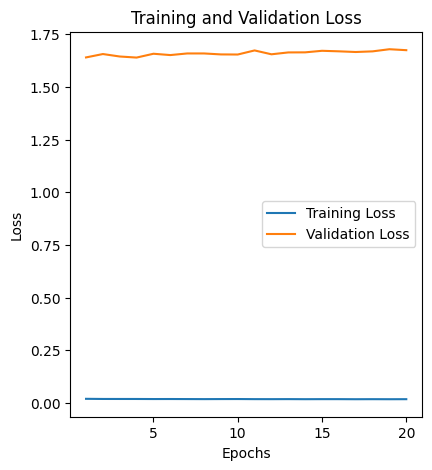

Test Loss: 1.5454, Test Accuracy: 76.4877
Classification Report for Bidirectional LSTM Model:
              precision    recall  f1-score   support

    negative       0.87      0.83      0.85      1889
     neutral       0.53      0.55      0.54       580
    positive       0.56      0.66      0.60       459

    accuracy                           0.74      2928
   macro avg       0.65      0.68      0.66      2928
weighted avg       0.76      0.74      0.75      2928

Setup  86    Learning rate: 0.005     Number of epochs: 20     Momentum: 0.9
Training for num_epochs=20, lr=0.005, momentum=0.9
Epoch 1/20, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.5678, Val Accuracy: 0.7123
Epoch 2/20, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.6026, Val Accuracy: 0.7166
Epoch 3/20, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.5371, Val Accuracy: 0.7328
Epoch 4/20, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.5679, Val Accuracy: 0.7388
Epoch 5/20, Train

<Figure size 1000x600 with 0 Axes>

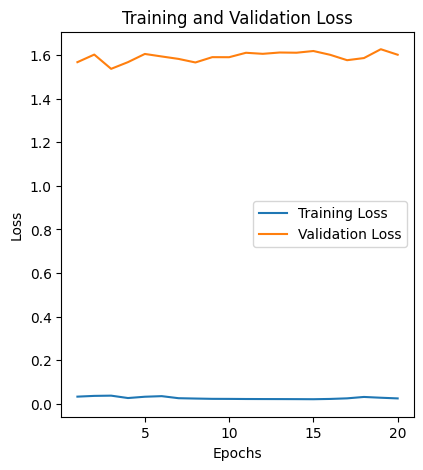

Test Loss: 1.4540, Test Accuracy: 76.8975
Classification Report for Bidirectional LSTM Model:
              precision    recall  f1-score   support

    negative       0.87      0.84      0.85      1889
     neutral       0.53      0.53      0.53       580
    positive       0.57      0.64      0.61       459

    accuracy                           0.75      2928
   macro avg       0.66      0.67      0.66      2928
weighted avg       0.75      0.75      0.75      2928

Setup  87    Learning rate: 0.01     Number of epochs: 20     Momentum: 0.8
Training for num_epochs=20, lr=0.01, momentum=0.8
Epoch 1/20, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.6068, Val Accuracy: 0.7260
Epoch 2/20, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.6201, Val Accuracy: 0.7222
Epoch 3/20, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.6192, Val Accuracy: 0.7256
Epoch 4/20, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.6232, Val Accuracy: 0.7243
Epoch 5/20, Train L

<Figure size 1000x600 with 0 Axes>

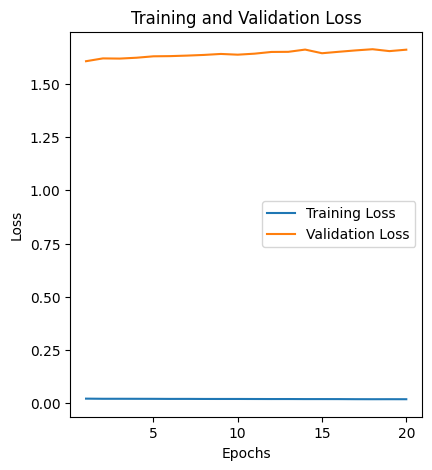

Test Loss: 1.5312, Test Accuracy: 76.0096
Classification Report for Bidirectional LSTM Model:
              precision    recall  f1-score   support

    negative       0.88      0.83      0.85      1889
     neutral       0.51      0.53      0.52       580
    positive       0.55      0.65      0.60       459

    accuracy                           0.74      2928
   macro avg       0.65      0.67      0.66      2928
weighted avg       0.75      0.74      0.75      2928

Setup  88    Learning rate: 0.01     Number of epochs: 20     Momentum: 0.9
Training for num_epochs=20, lr=0.01, momentum=0.9
Epoch 1/20, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.6683, Val Accuracy: 0.7230
Epoch 2/20, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.6799, Val Accuracy: 0.7243
Epoch 3/20, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.6802, Val Accuracy: 0.7162
Epoch 4/20, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.6850, Val Accuracy: 0.7200
Epoch 5/20, Train L

<Figure size 1000x600 with 0 Axes>

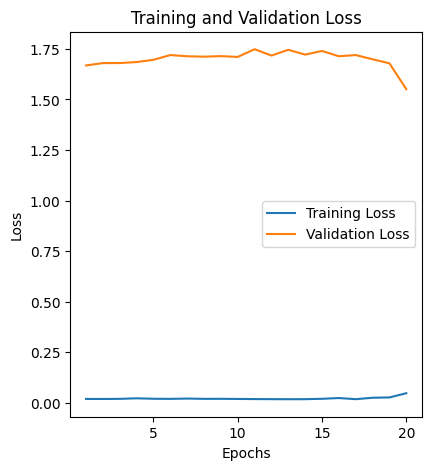

Test Loss: 1.4167, Test Accuracy: 76.0096
Classification Report for Bidirectional LSTM Model:
              precision    recall  f1-score   support

    negative       0.87      0.83      0.85      1889
     neutral       0.51      0.53      0.52       580
    positive       0.56      0.62      0.59       459

    accuracy                           0.74      2928
   macro avg       0.65      0.66      0.65      2928
weighted avg       0.75      0.74      0.74      2928

Setup  89    Learning rate: 0.005     Number of epochs: 20     Momentum: 0.8
Training for num_epochs=20, lr=0.005, momentum=0.8
Epoch 1/20, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.5371, Val Accuracy: 0.7209
Epoch 2/20, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.5368, Val Accuracy: 0.7175
Epoch 3/20, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.5626, Val Accuracy: 0.7157
Epoch 4/20, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.5801, Val Accuracy: 0.7196
Epoch 5/20, Train

<Figure size 1000x600 with 0 Axes>

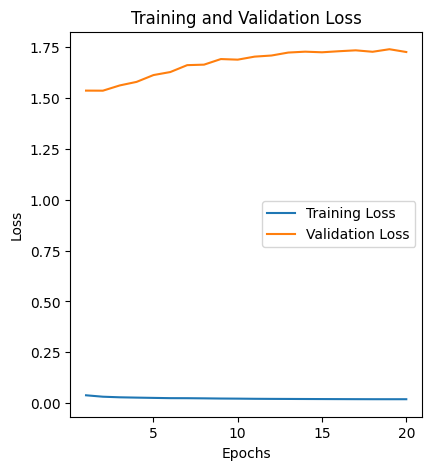

Test Loss: 1.5720, Test Accuracy: 76.5560
Classification Report for Bidirectional LSTM Model:
              precision    recall  f1-score   support

    negative       0.87      0.83      0.85      1889
     neutral       0.52      0.53      0.53       580
    positive       0.56      0.67      0.61       459

    accuracy                           0.75      2928
   macro avg       0.65      0.68      0.66      2928
weighted avg       0.76      0.75      0.75      2928

Setup  90    Learning rate: 0.005     Number of epochs: 20     Momentum: 0.9
Training for num_epochs=20, lr=0.005, momentum=0.9
Epoch 1/20, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.7455, Val Accuracy: 0.7209
Epoch 2/20, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.7297, Val Accuracy: 0.7187
Epoch 3/20, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.7291, Val Accuracy: 0.7209
Epoch 4/20, Train Loss: 0.1704, Train Accuracy: 0.9495, Val Loss: 1.7484, Val Accuracy: 0.7213
Epoch 5/20, Train

<Figure size 1000x600 with 0 Axes>

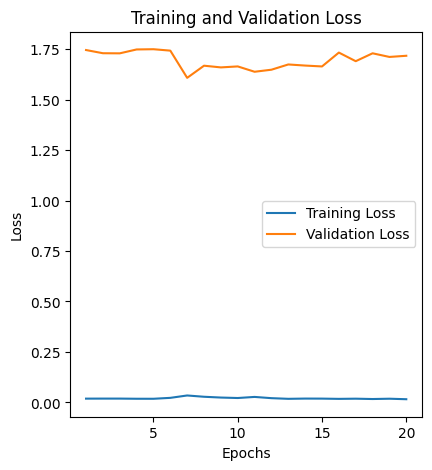

Test Loss: 1.5903, Test Accuracy: 76.4877
Classification Report for Bidirectional LSTM Model:
              precision    recall  f1-score   support

    negative       0.87      0.83      0.85      1889
     neutral       0.51      0.54      0.53       580
    positive       0.58      0.65      0.62       459

    accuracy                           0.74      2928
   macro avg       0.66      0.67      0.66      2928
weighted avg       0.75      0.74      0.75      2928

Best model with accuracy 76.89754098360656


In [37]:
list_epochs = [10, 15, 20]
list_learning_rate = [0.005, 0.01, 0.005]
momentum = [0.8, 0.9]

best_val_loss_bi_lstm = float('inf')
# different setups with different learning rate, momentum, number of epochs with SGD Optimizer
best_test_accuracy = 0
for num_epochs in list_epochs:
    for lr in list_learning_rate:
        for m in momentum:
            train_losses = []
            train_accuracies = []
            val_losses = []
            val_accuracies = []
            test_losses = []
            test_accuracies = []
            count += 1
            print("Setup ", count, "   Learning rate:", lr, "    Number of epochs:", epochs, "    Momentum:", m)
            criterion = nn.CrossEntropyLoss()
            optimizer = torch.optim.SGD(bilstm_model.parameters(), lr=0.001,momentum = m)
            bilstm_model.to(device)

            print(f"Training for num_epochs={num_epochs}, lr={lr}, momentum={m}")

            for epoch in range(num_epochs):
                bilstm_model.train()
                running_loss = 0.0
                correct = 0
                total = 0
                for inputs, labels in train_loader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    optimizer.zero_grad()
                    outputs = bilstm_model(inputs)
                    loss = criterion(outputs, labels)
                    loss.backward()
                    optimizer.step()
                    running_loss += loss.item() * inputs.size(0)
                    _, predicted = torch.max(outputs, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()
                train_loss = running_loss / len(train_loader.dataset)
                train_accuracy = correct / total
                train_losses.append(train_loss)
                train_accuracies.append(train_accuracies)

                # Evaluate on validation set
                bilstm_model.eval()
                val_loss = 0.0
                correct = 0
                total = 0
                with torch.no_grad():
                    for inputs, labels in val_loader:
                        inputs, labels = inputs.to(device), labels.to(device)
                        outputs = bilstm_model(inputs)
                        loss = criterion(outputs, labels)
                        val_loss += loss.item() * inputs.size(0)
                        _, predicted = torch.max(outputs, 1)
                        total += labels.size(0)
                        correct += (predicted == labels).sum().item()
                val_loss = val_loss / len(val_loader.dataset)
                val_accuracy = correct / total
                val_losses.append(val_loss)
                val_accuracies.append(val_accuracy)



                print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')

                # Save the best model
                if val_loss < best_val_loss_bi_lstm:
                    best_val_loss_bi_lstm = val_loss
                    torch.save(bilstm_model.state_dict(), 'best_bi_lstm_model.h5')



            # Testing
            bilstm_model.eval()
            test_loss = 0.0
            correct = 0
            total = 0
            predictions_bi_lstm = []
            true_labels_bi_lstm = []
            plt.figure(figsize=(10, 6))
            # Plotting training and validation metrics
            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
            plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.title('Training and Validation Loss')
            plt.legend()
            plt.show()


            with torch.no_grad():
                for inputs, labels in test_loader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    outputs = bilstm_model(inputs)
                    loss = criterion(outputs, labels)
                    test_loss += loss.item() * inputs.size(0)
                    _, predicted = torch.max(outputs, 1)
                    predictions_bi_lstm.extend(predicted.tolist())
                    true_labels_bi_lstm.extend(labels.tolist())
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()

            # Test accuracy,loss
            test_loss = test_loss / len(test_loader.dataset)
            test_accuracy = correct / total
            test_accuracies.append(test_accuracy)



            if best_test_accuracy < test_accuracy:
              best_test_accuracy = test_accuracy
              best_learning_rate = lr
              best_no_epochs = num_epochs
              best_momentum = m


            print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {(test_accuracy)*100:.4f}')
            predictions_bi_lstm = label_encoder.inverse_transform(predictions_bi_lstm)
            true_labels_bi_lstm = label_encoder.inverse_transform(true_labels_bi_lstm)
            print("Classification Report for Bidirectional LSTM Model:")
            print(classification_report(true_labels_bi_lstm, predictions_bi_lstm))
print("Best model with accuracy",(best_test_accuracy)*100)



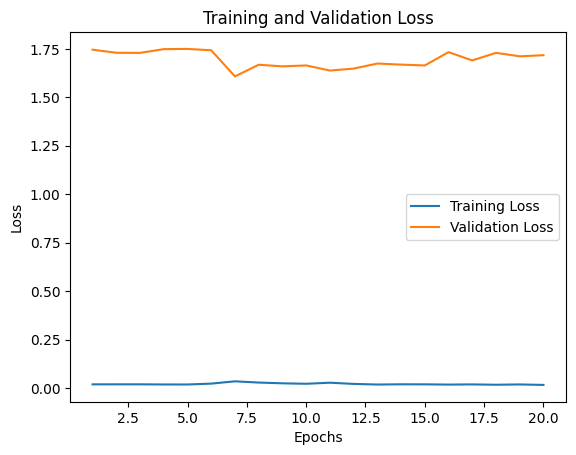

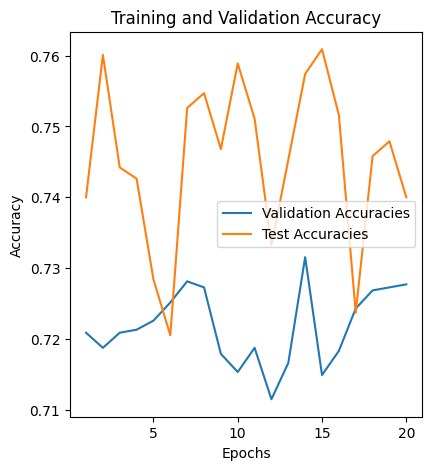

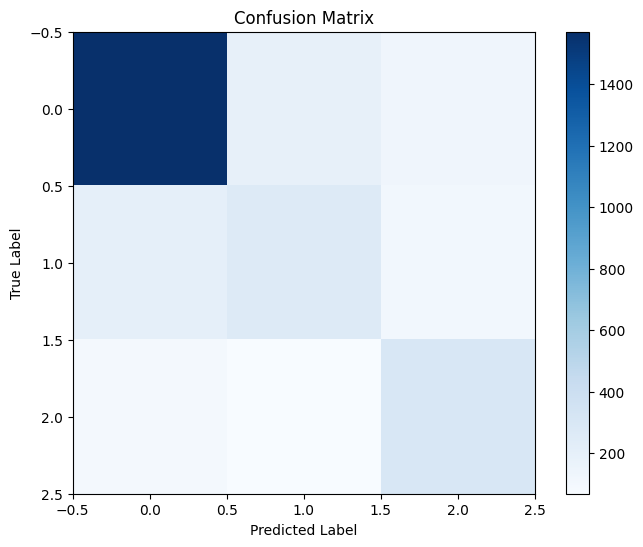

In [46]:
plt.plot(range(1, len(train_losses)+1), train_losses, label='Training Loss')
plt.plot(range(1, len(val_losses)+1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# # Plotting visualization graphs
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(val_accuracies)+1), val_accuracies, label='Validation Accuracies')
plt.plot(range(1, len(test_accuracies)+1), test_accuracies, label='Test Accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# References

Assignment2 from CSE 574 Introduction to Machine Learning done by Pavani Ayanambakam

https://medium.com/analytics-vidhya/resnet-understand-and-implement-from-scratch-d0eb9725e0db

https://pytorch.org/vision/main/models/generated/torchvision.models.resnet18.html

In [ ]:
https://www.kaggle.com/code/ivankunyankin/resnet18-from-scratch-using-pytorch